In [911]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from typing import Dict, Any
from collections import Counter

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 50) 
import sklearn as sk
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, 
    average_precision_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve, make_scorer
)
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250
import dvu  # for visualization

import imodels

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')

from experiments.models.stablelinear import StableLinearClassifier
from experiments.models.stableskope import StableSkopeClassifier
from experiments.notebooks import viz
from experiments.util import (
    get_comparison_result, get_openml_dataset, get_clean_dataset, 
    get_best_model_under_complexity, MODEL_COMPARISON_PATH, get_best_accuracy
)

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1066]:
# # from experiments.config.ensemble_config import get_weak_learner_inst_list

# wl_list = get_weak_learner_inst_list([35])[0]
# del wl_list[3]
# wl_list

# # np.random.seed(0)
x, y, feat_names = get_clean_dataset('experiments/data/ICPSR_03986/DS0001/data_clean.csv')
xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

# m1 = StableLinearClassifier(
#     weak_learners=wl_list,
#     max_complexity = 6,
#     alpha = 1,
#     min_mult = 1,
#     penalty = 'l1',
#     max_rules = None,
#     include_linear = False)
# # m2 = imodels.FPLassoClassifier(alpha=630.957344480193, disc_strategy='simple', max_rules=None, maxcardinality=1, include_linear = False)
# m2 = imodels.RuleFitClassifier(alpha=30, include_linear=False, max_rules=None, n_estimators=3, random_state=0)
# m4 = imodels.BoostedRulesClassifier(n_estimators=5)
# m5 = imodels.SkopeRulesClassifier(max_depth=1, n_estimators=100, precision_min=0.3)

# ms = [m1, m2, m4, m5]
# for model in ms:
#     model.fit(xtrain, ytrain, feature_names=feat_names)

# [m.complexity_ for m in ms]
# [get_best_accuracy(m) for m in ms]

In [687]:
# for i, model in enumerate(ms):
#     plt.subplot(2, 2, i + 1)
#     yscores = model.predict_proba(xtest)[:, 1]
#     plt.title(repr(model)[:10] + ' - AP ' + str(average_precision_score(ytest, yscores))[:5])
# #     plt.title(repr(model)[:10] + ' - AUC ' + str(roc_auc_score(ytest, yscores))[:5])
#     y, x, _ = precision_recall_curve(ytest, yscores)
# #     x, y, _ = roc_curve(ytest, model.predict_proba(xtest)[:, 1])
#     plt.step(x, y)
# plt.tight_layout()

In [91]:
# rule_df = get_comparison_result(MODEL_COMPARISON_PATH, 'stbl_l1_mm1', 'test')['rule_df']
# comp_result = get_comparison_result(MODEL_COMPARISON_PATH, 'stbl_l1_mm1', 'test')

In [1063]:
# get_comparison_result(MODEL_COMPARISON_PATH, 'skope_rules', 'credit')['df']

n_estimators  precision_min  credit_rocauc  \
skope_rules - prec_0.5             1           0.50       0.644226   
skope_rules - prec_0.5             9           0.50       0.645670   
skope_rules - prec_0.5            17           0.50       0.683555   
skope_rules - prec_0.5            25           0.50       0.670445   
skope_rules - prec_0.5            33           0.50       0.670529   
skope_rules - prec_0.5            41           0.50       0.703229   
skope_rules - prec_0.5            49           0.50       0.703143   
skope_rules - prec_0.5            57           0.50       0.702486   
skope_rules - prec_0.5            65           0.50       0.702747   
skope_rules - prec_0.5            73           0.50       0.701842   
skope_rules - prec_.45             1           0.45       0.694817   
skope_rules - prec_.45             2           0.45       0.694954   
skope_rules - prec_.45             3           0.45       0.670053   
skope_rules - prec_.45             5           0.45       0.695167   
skope_rules - prec_.45             9           0.45       0.714317   
skope_rules - prec_.45            13           0.45       0.704166   
skope_rules - prec_.45            17           0.45       0.695909   
skope_rules - prec_.45            21           0.45       0.696203   
skope_rules - prec_.45            25           0.45       0.696042   
skope_rules - prec_.45            29           0.45       0.703718   
skope_rules - prec_.45            33           0.45       0.702482   
skope_rules - prec_.45            37           0.45       0.696409   
skope_rules - prec_0.4             1           0.40       0.643970   
skope_rules - prec_0.4             2           0.40       0.692545   
skope_rules - prec_0.4             3           0.40       0.695524   
skope_rules - prec_0.4             4           0.40       0.695264   
skope_rules - prec_0.4             5           0.40       0.695827   
skope_rules - prec_0.4             6           0.40       0.714053   
skope_rules - prec_0.4             7           0.40       0.695551   
skope_rules - prec_0.4             8           0.40       0.696157   
skope_rules - prec_0.4             9           0.40       0.695843   
skope_rules - prec_0.4            10           0.40       0.695596   
skope_rules - prec_0.4            11           0.40       0.696236   
skope_rules - prec_0.4            12           0.40       0.695946   

                        credit_avg_precision  credit_best_accuracy  \
skope_rules - prec_0.5              0.373632              0.816875   
skope_rules - prec_0.5              0.390801              0.816875   
skope_rules - prec_0.5              0.434817              0.817708   
skope_rules - prec_0.5              0.419193              0.820000   
skope_rules - prec_0.5              0.419923              0.821042   
skope_rules - prec_0.5              0.459913              0.821458   
skope_rules - prec_0.5              0.458945              0.821458   
skope_rules - prec_0.5              0.455623              0.821458   
skope_rules - prec_0.5              0.455368              0.819375   
skope_rules - prec_0.5              0.453216              0.819792   
skope_rules - prec_.45              0.433741              0.816875   
skope_rules - prec_.45              0.435342              0.816875   
skope_rules - prec_.45              0.411453              0.819375   
skope_rules - prec_.45              0.440385              0.816875   
skope_rules - prec_.45              0.468438              0.819167   
skope_rules - prec_.45              0.457825              0.819375   
skope_rules - prec_.45              0.445794              0.817708   
skope_rules - prec_.45              0.450489              0.818542   
skope_rules - prec_.45              0.447626              0.820000   
skope_rules - prec_.45              0.455869              0.820208   
skope_rules - prec_.45              0.455427              0.819167   
skope_rules - prec_.45           

# validation plots - readmission

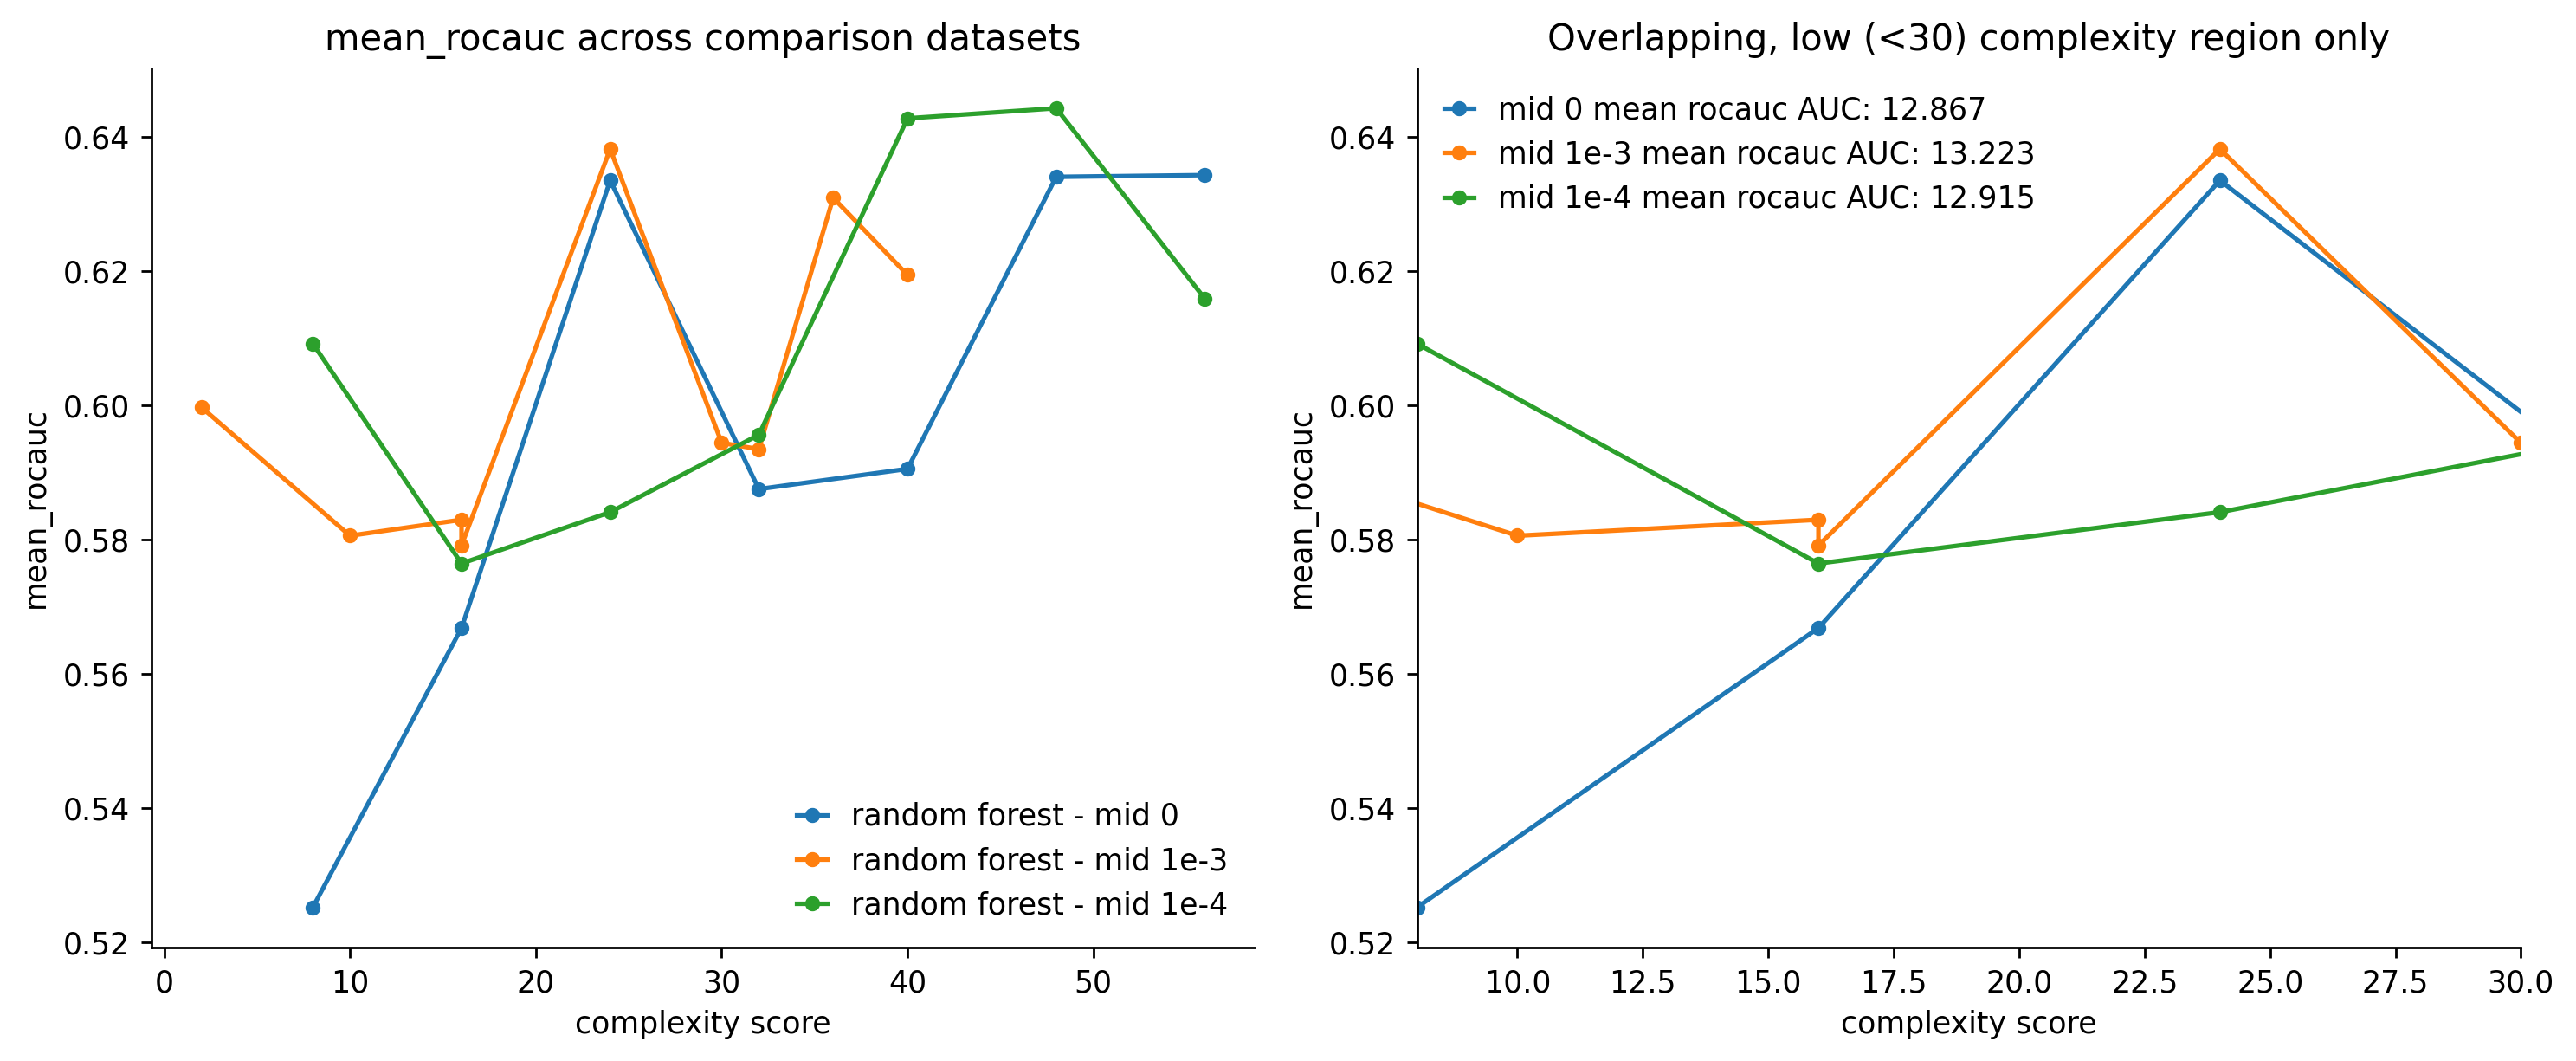

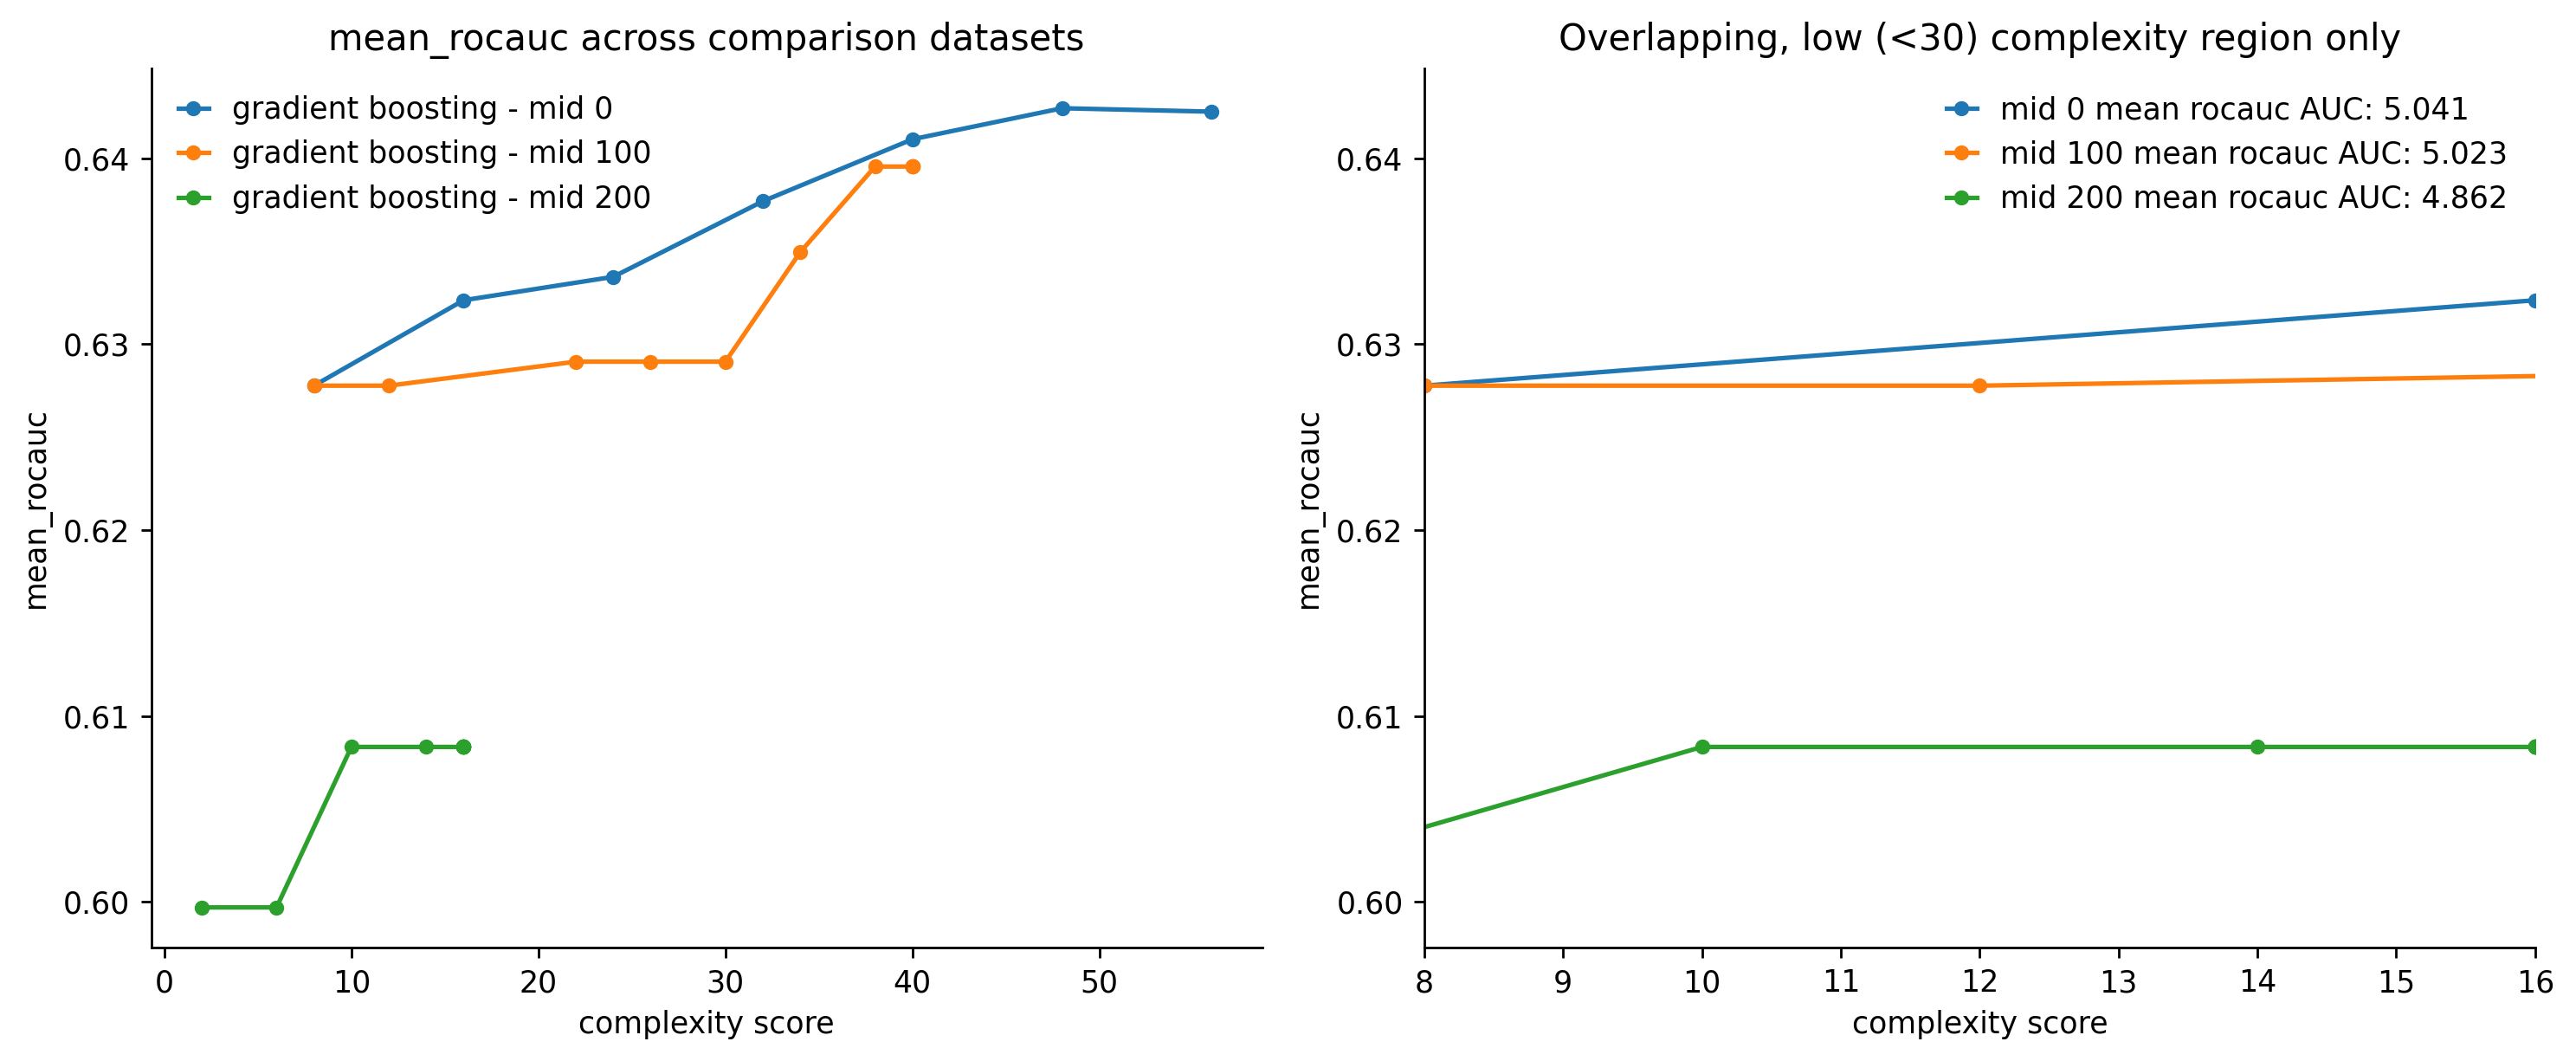

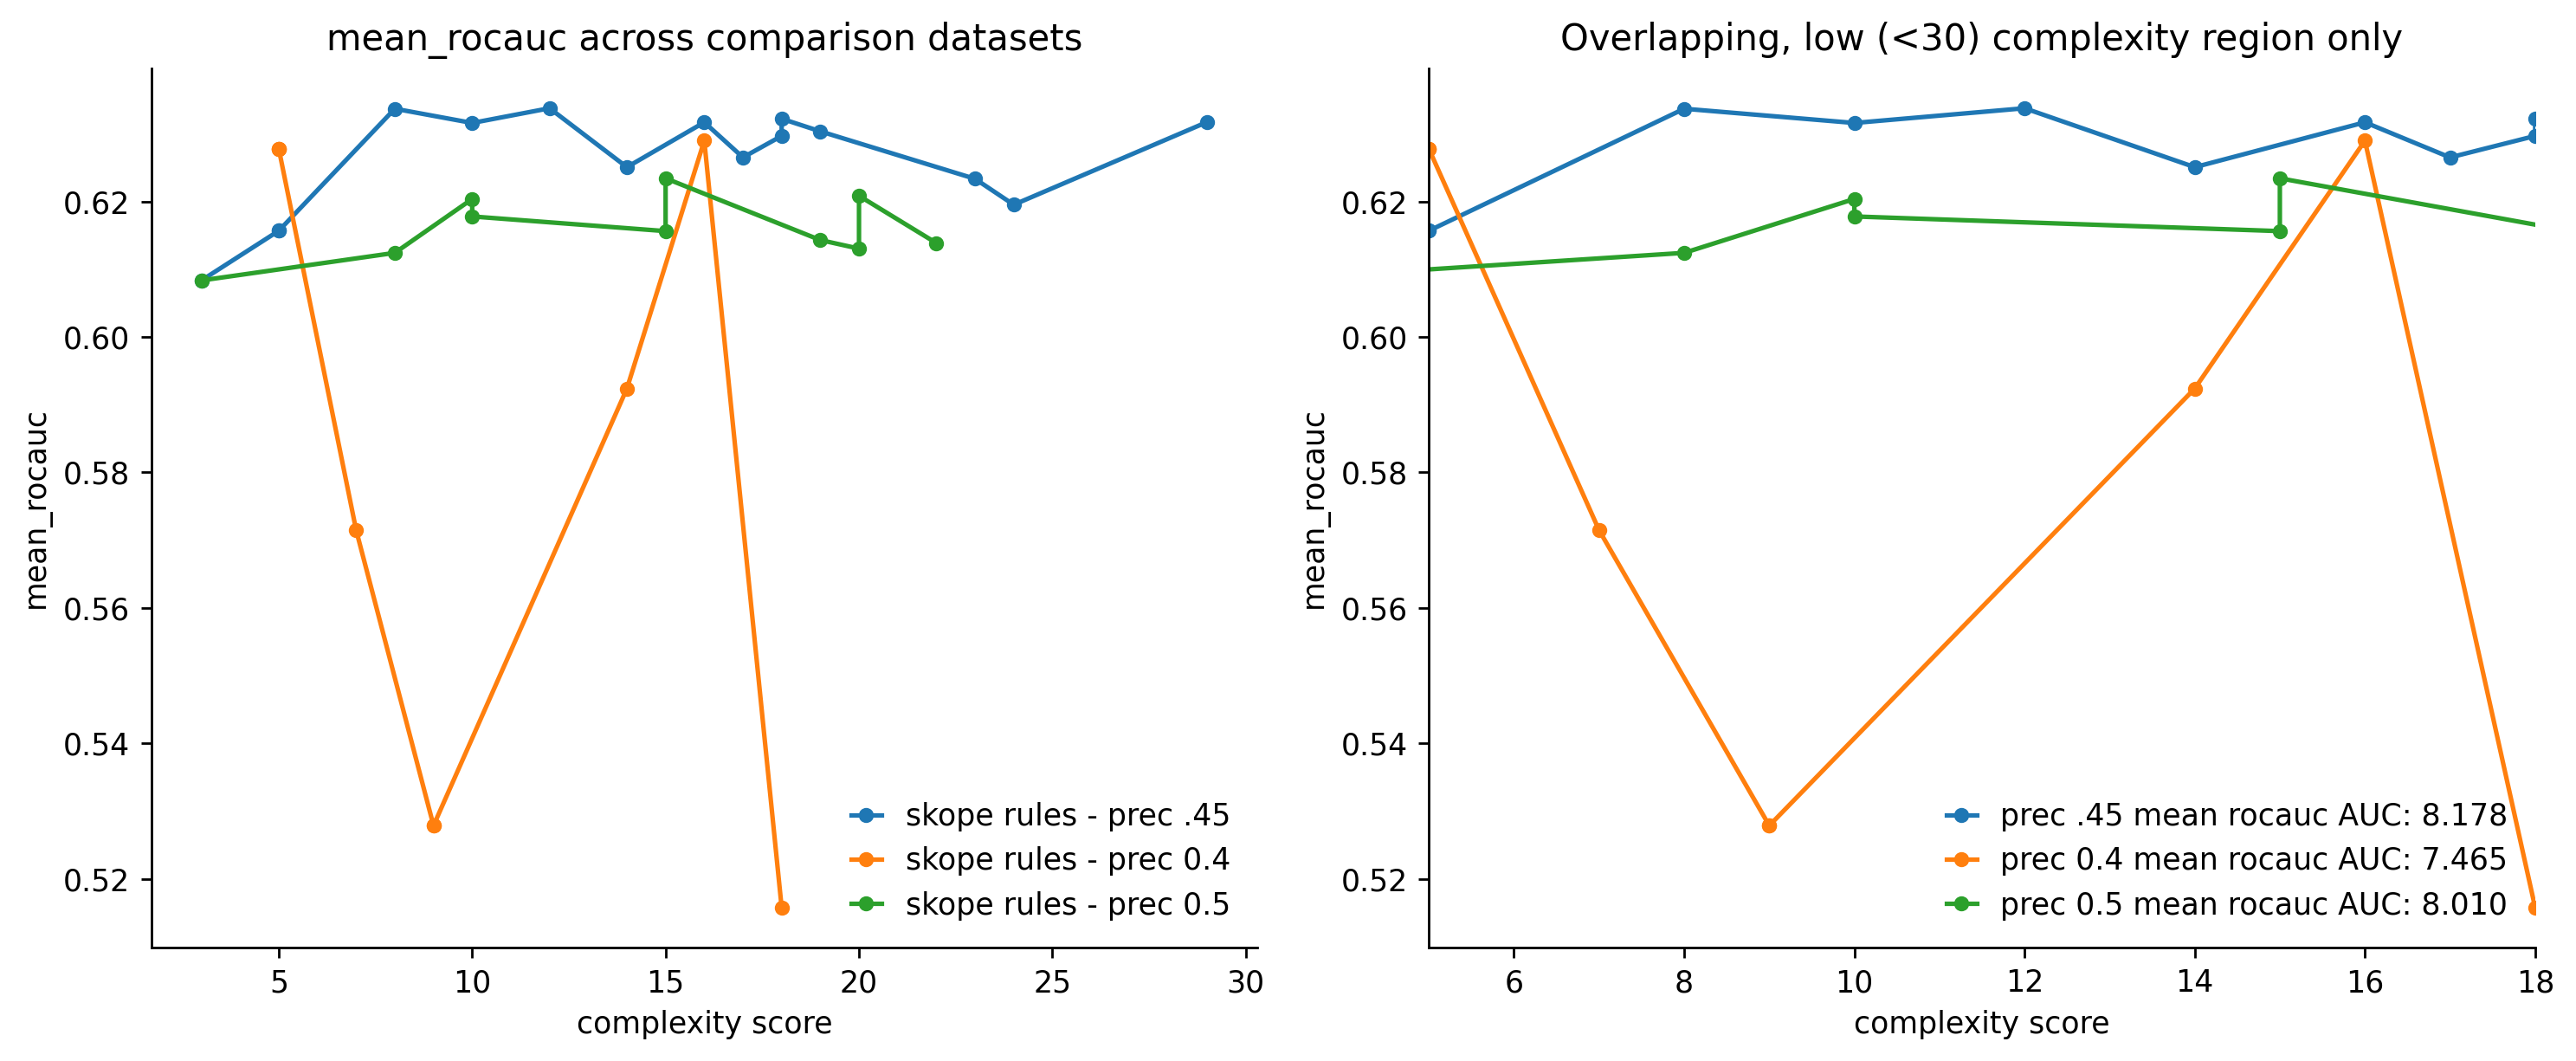

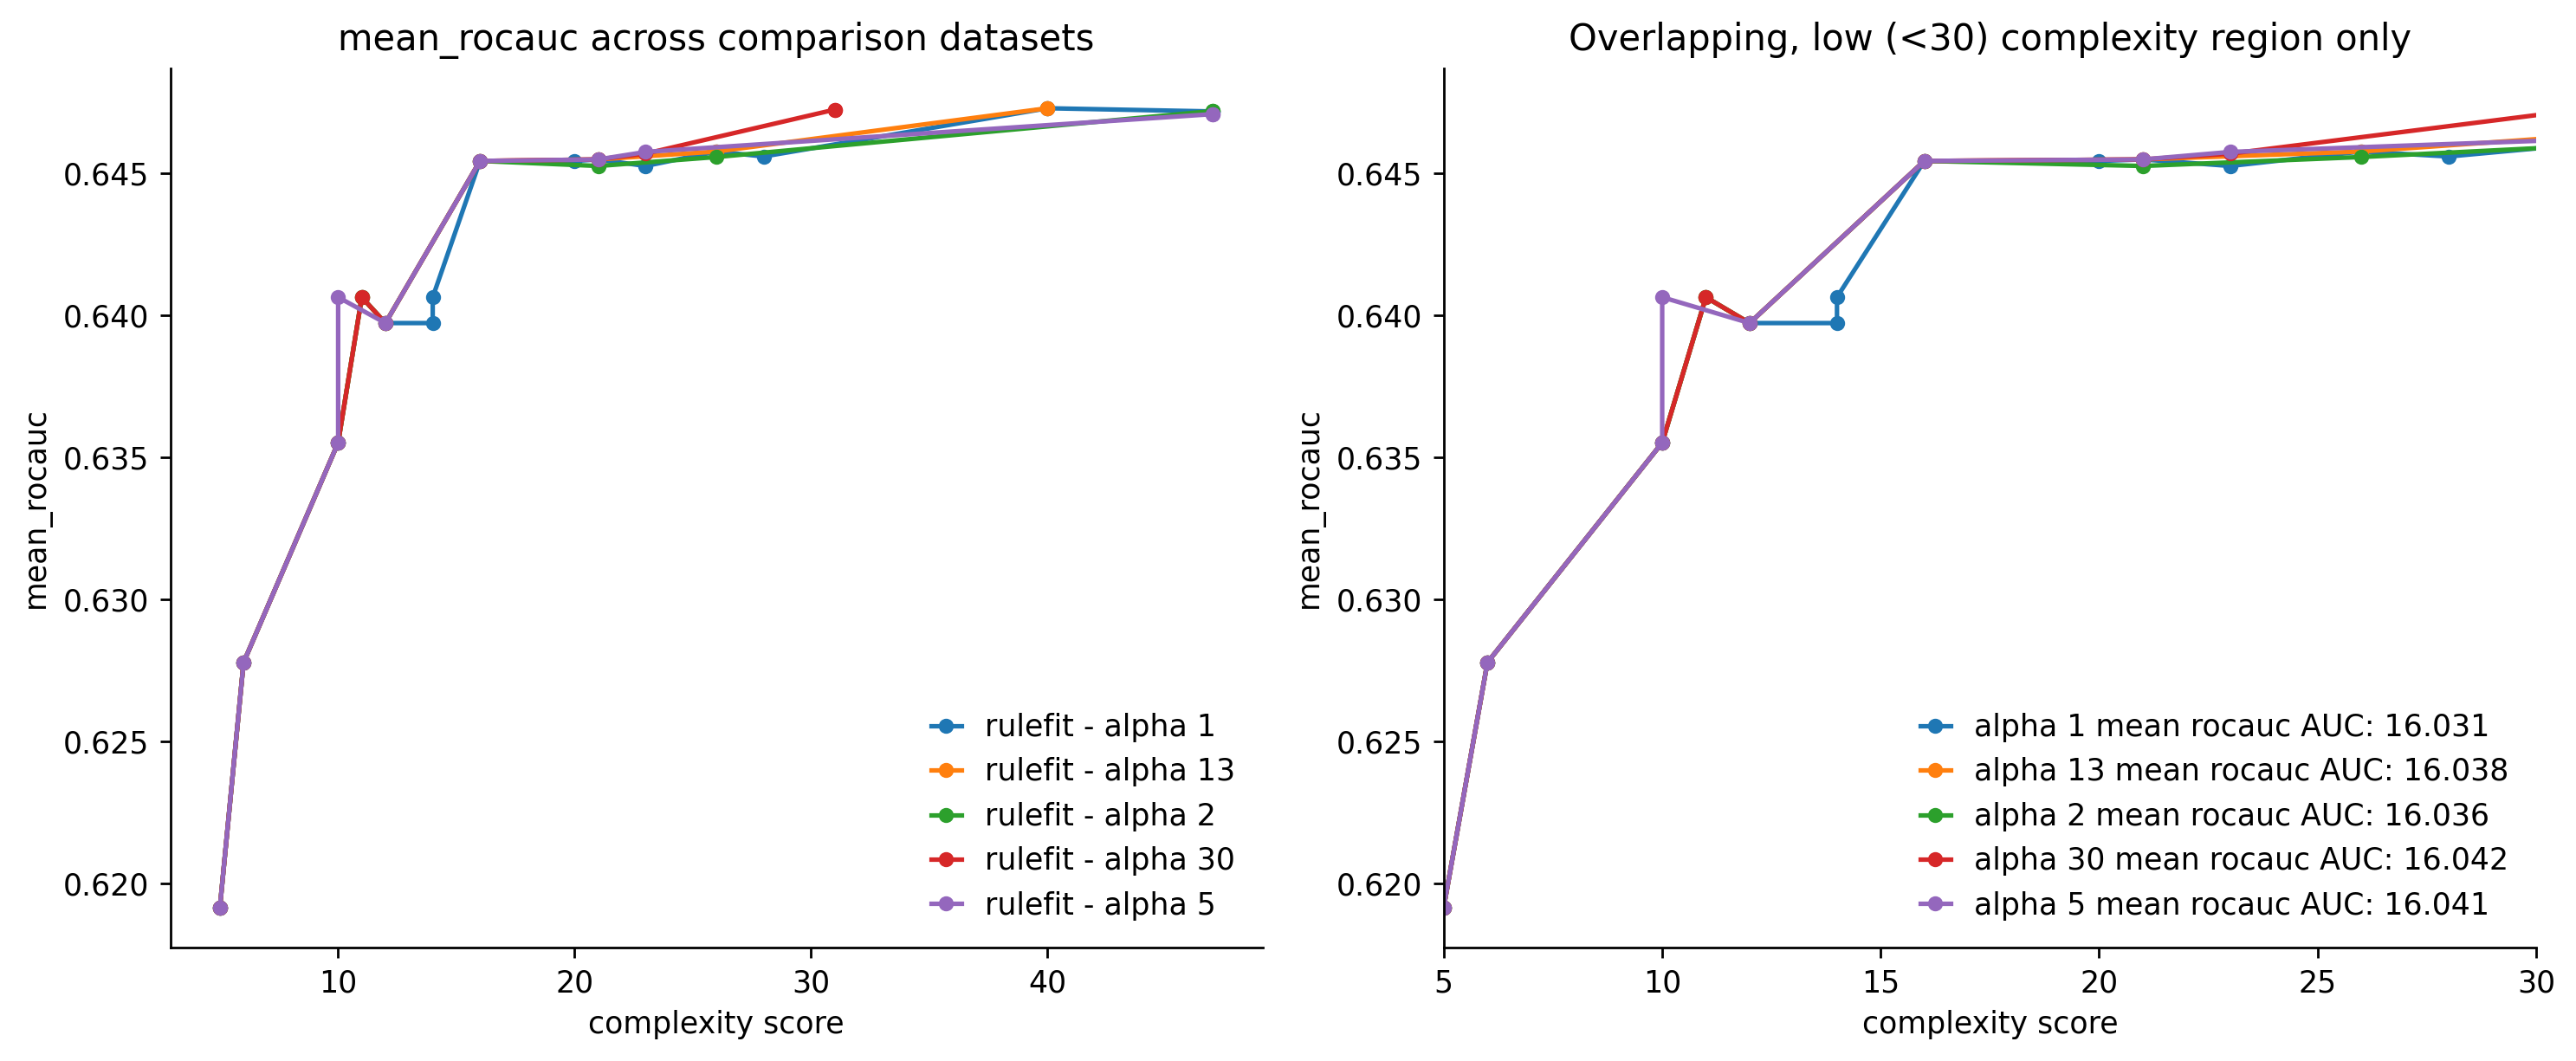

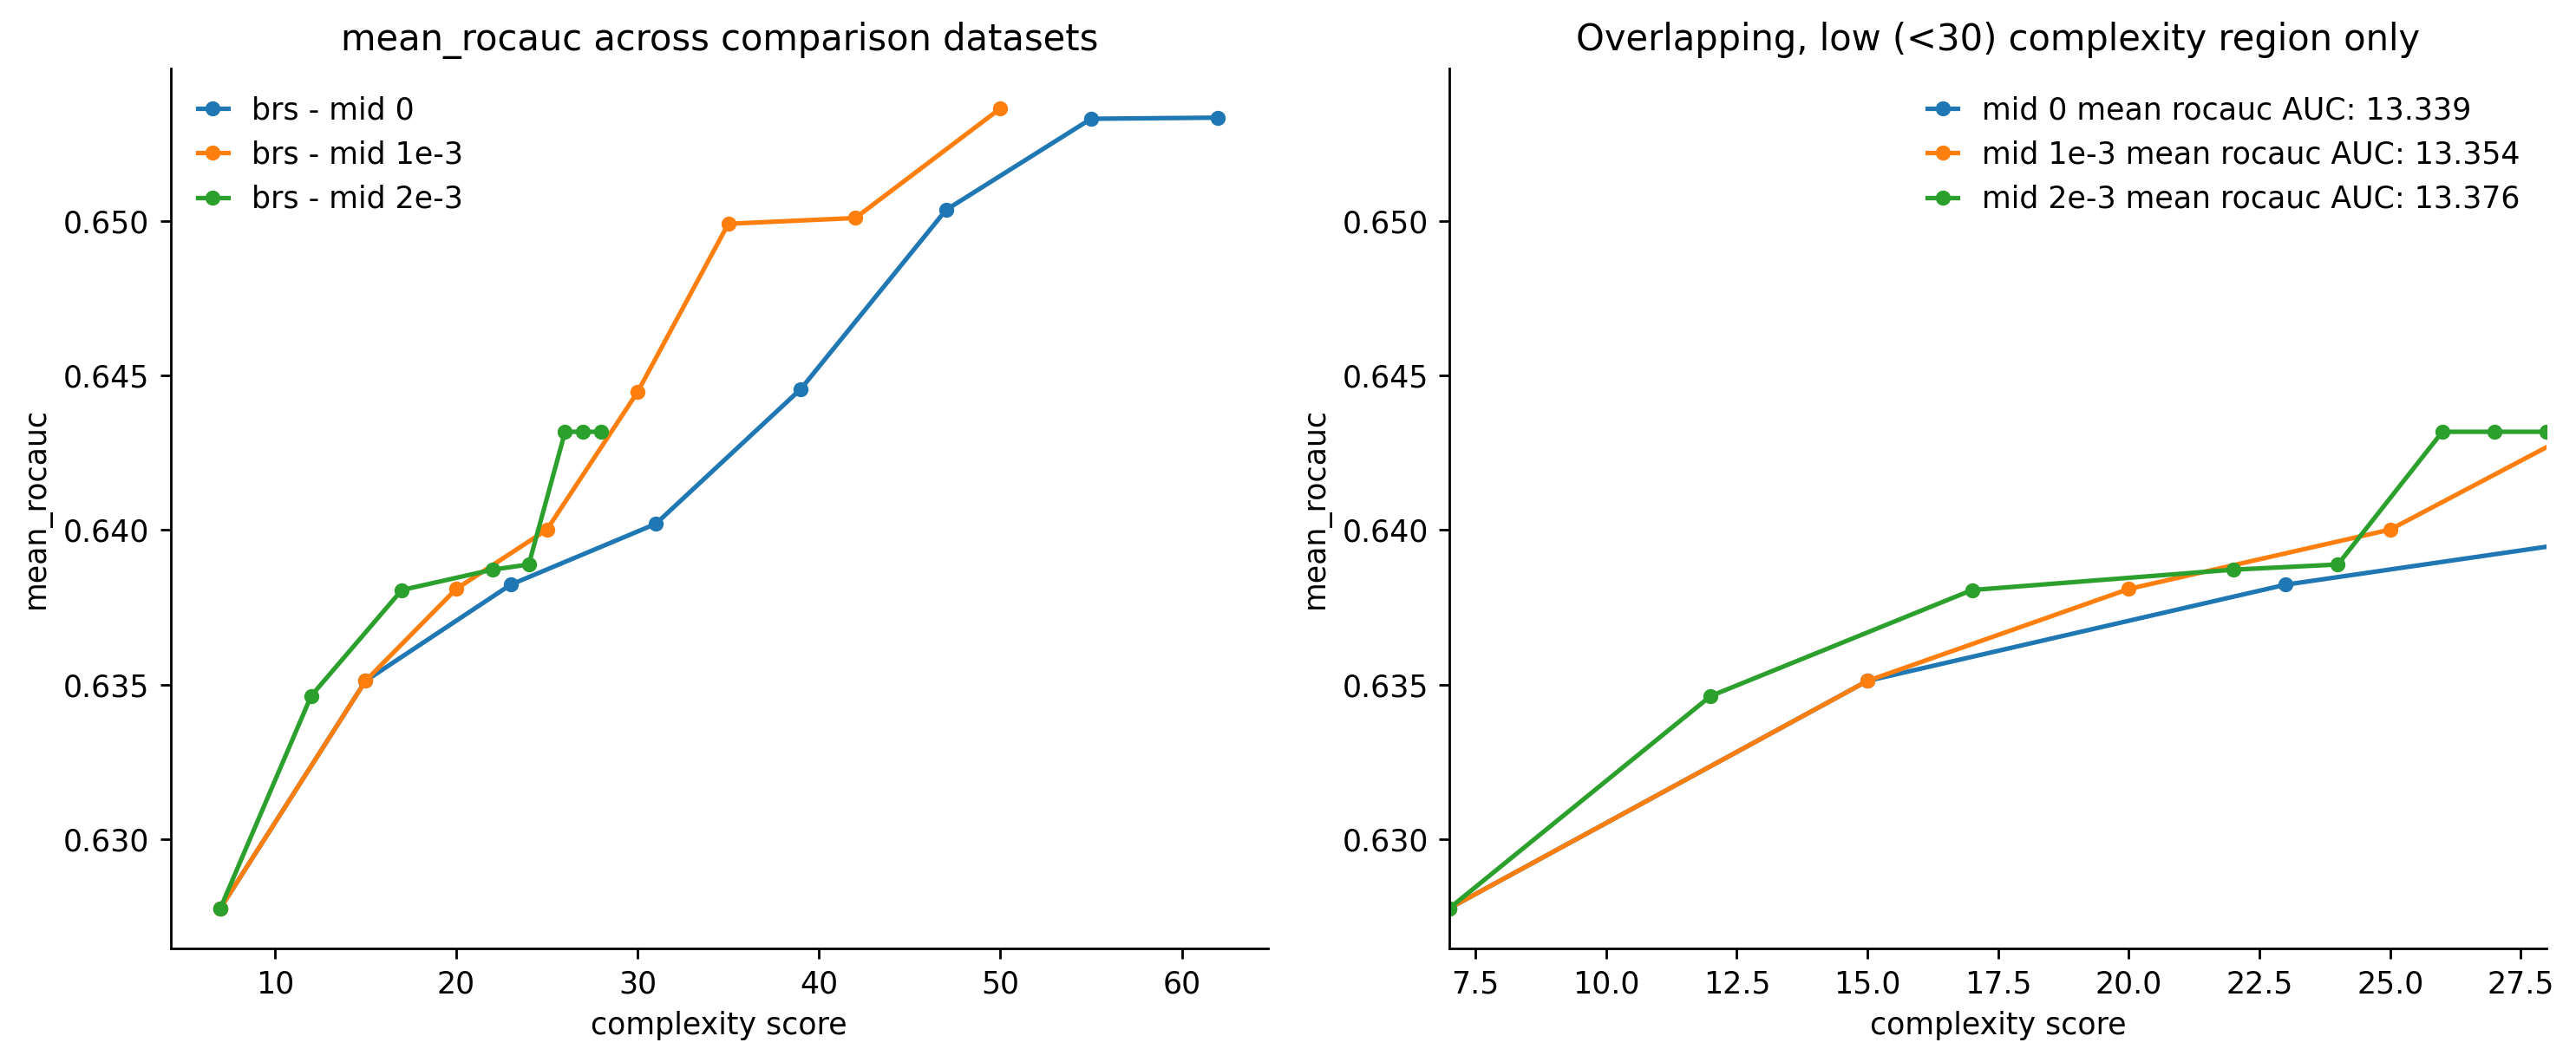

In [1065]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'brs']#'stbl_l2', 'stbl_l1', 'stbl_unlim_l1', 'stbl_unlim_fps_l1', 'fplasso', 'brl']
val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, 'readmission') for mname in val_models]
for result in val_results:
    viz.viz_comparison_val_average(result, metric='mean_rocauc')
    plt.show()

# validation plots - credit default

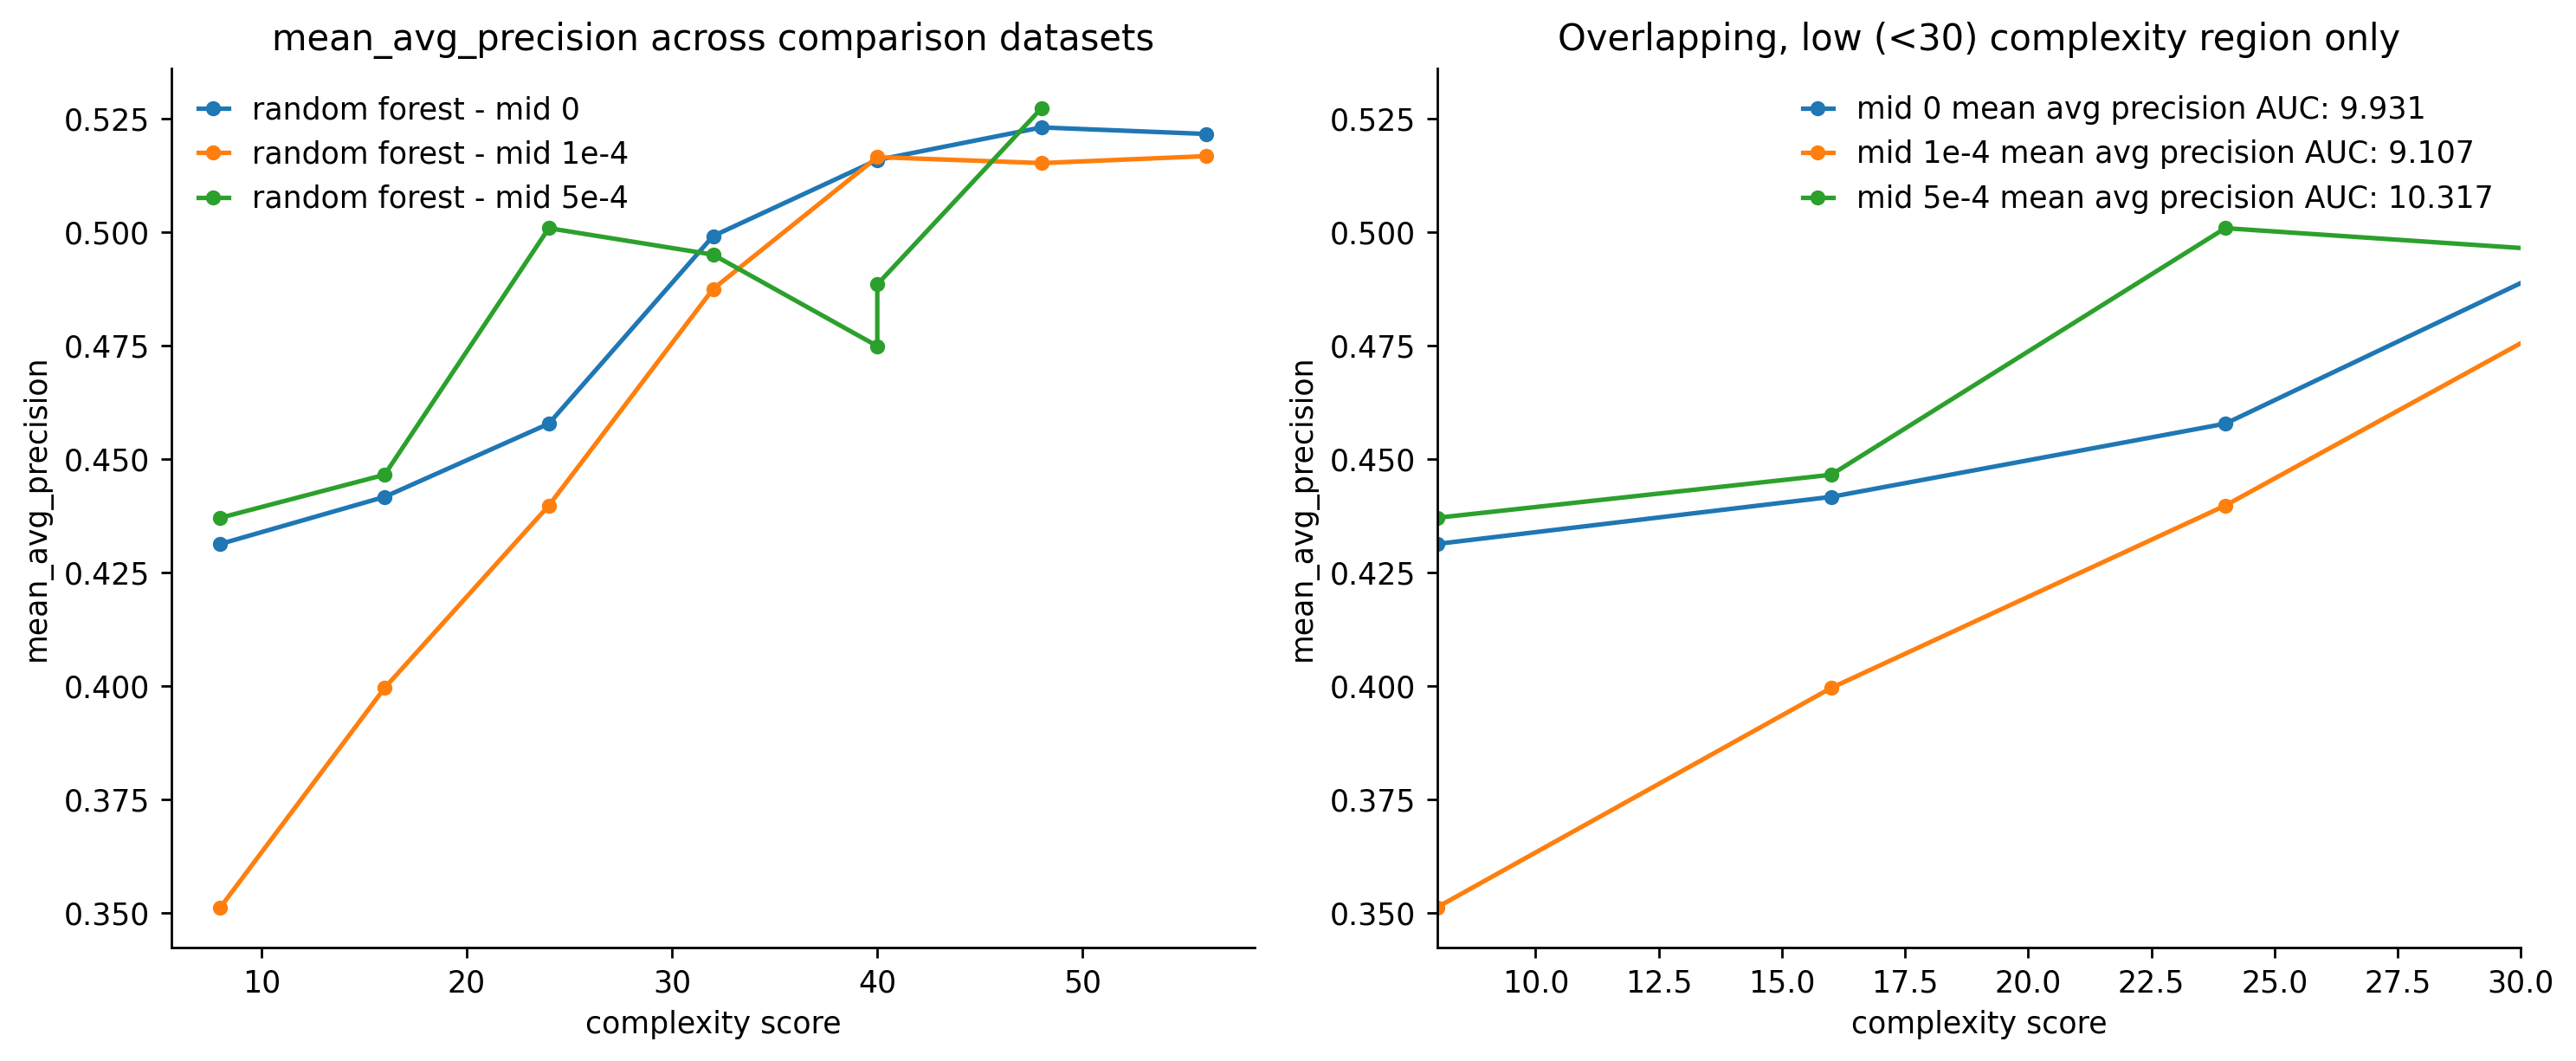

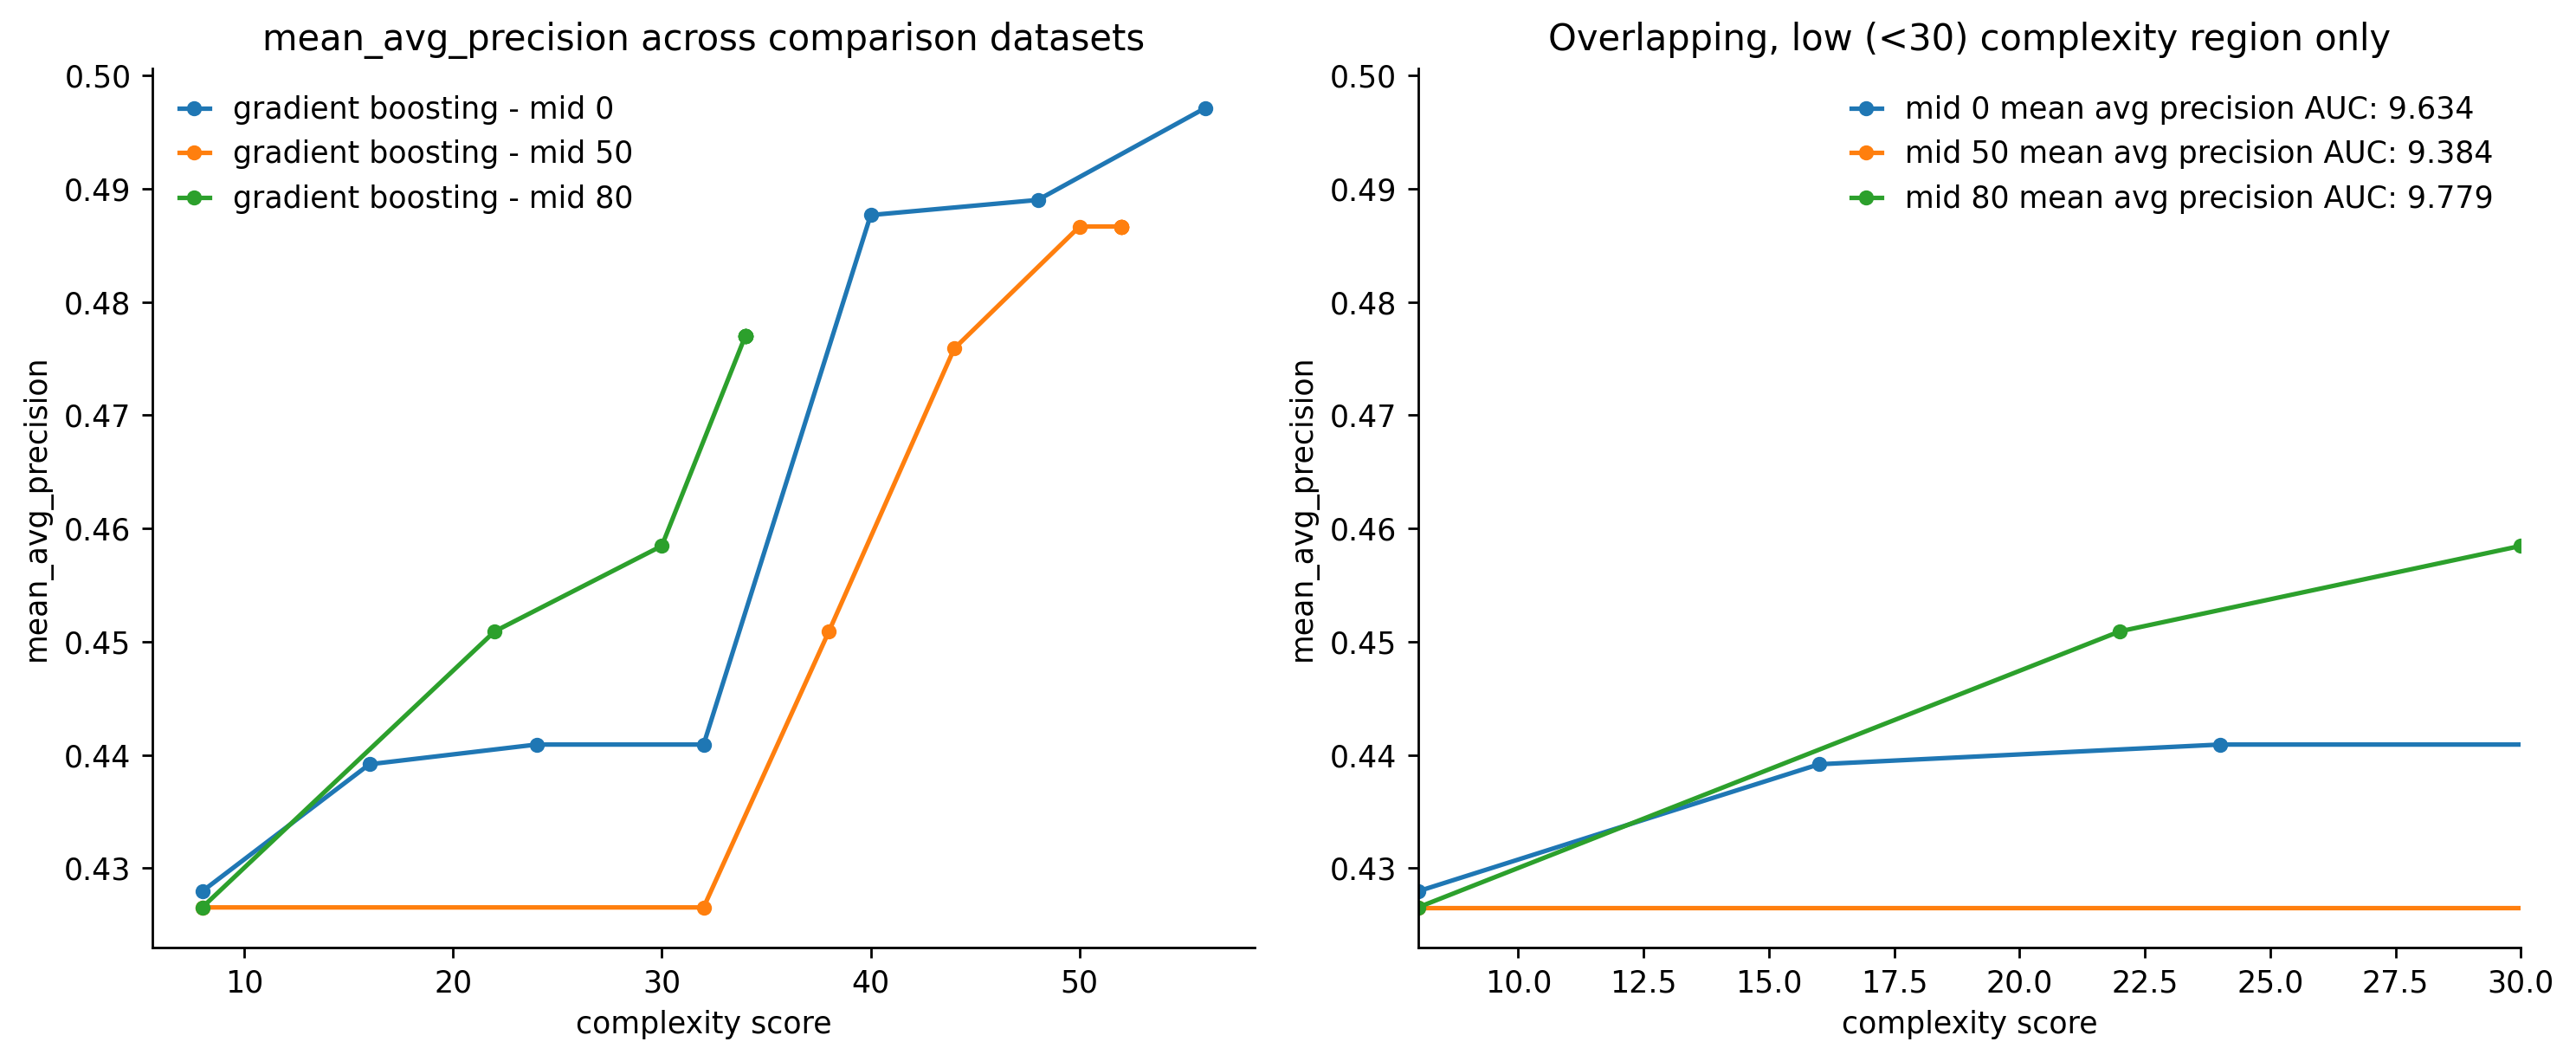

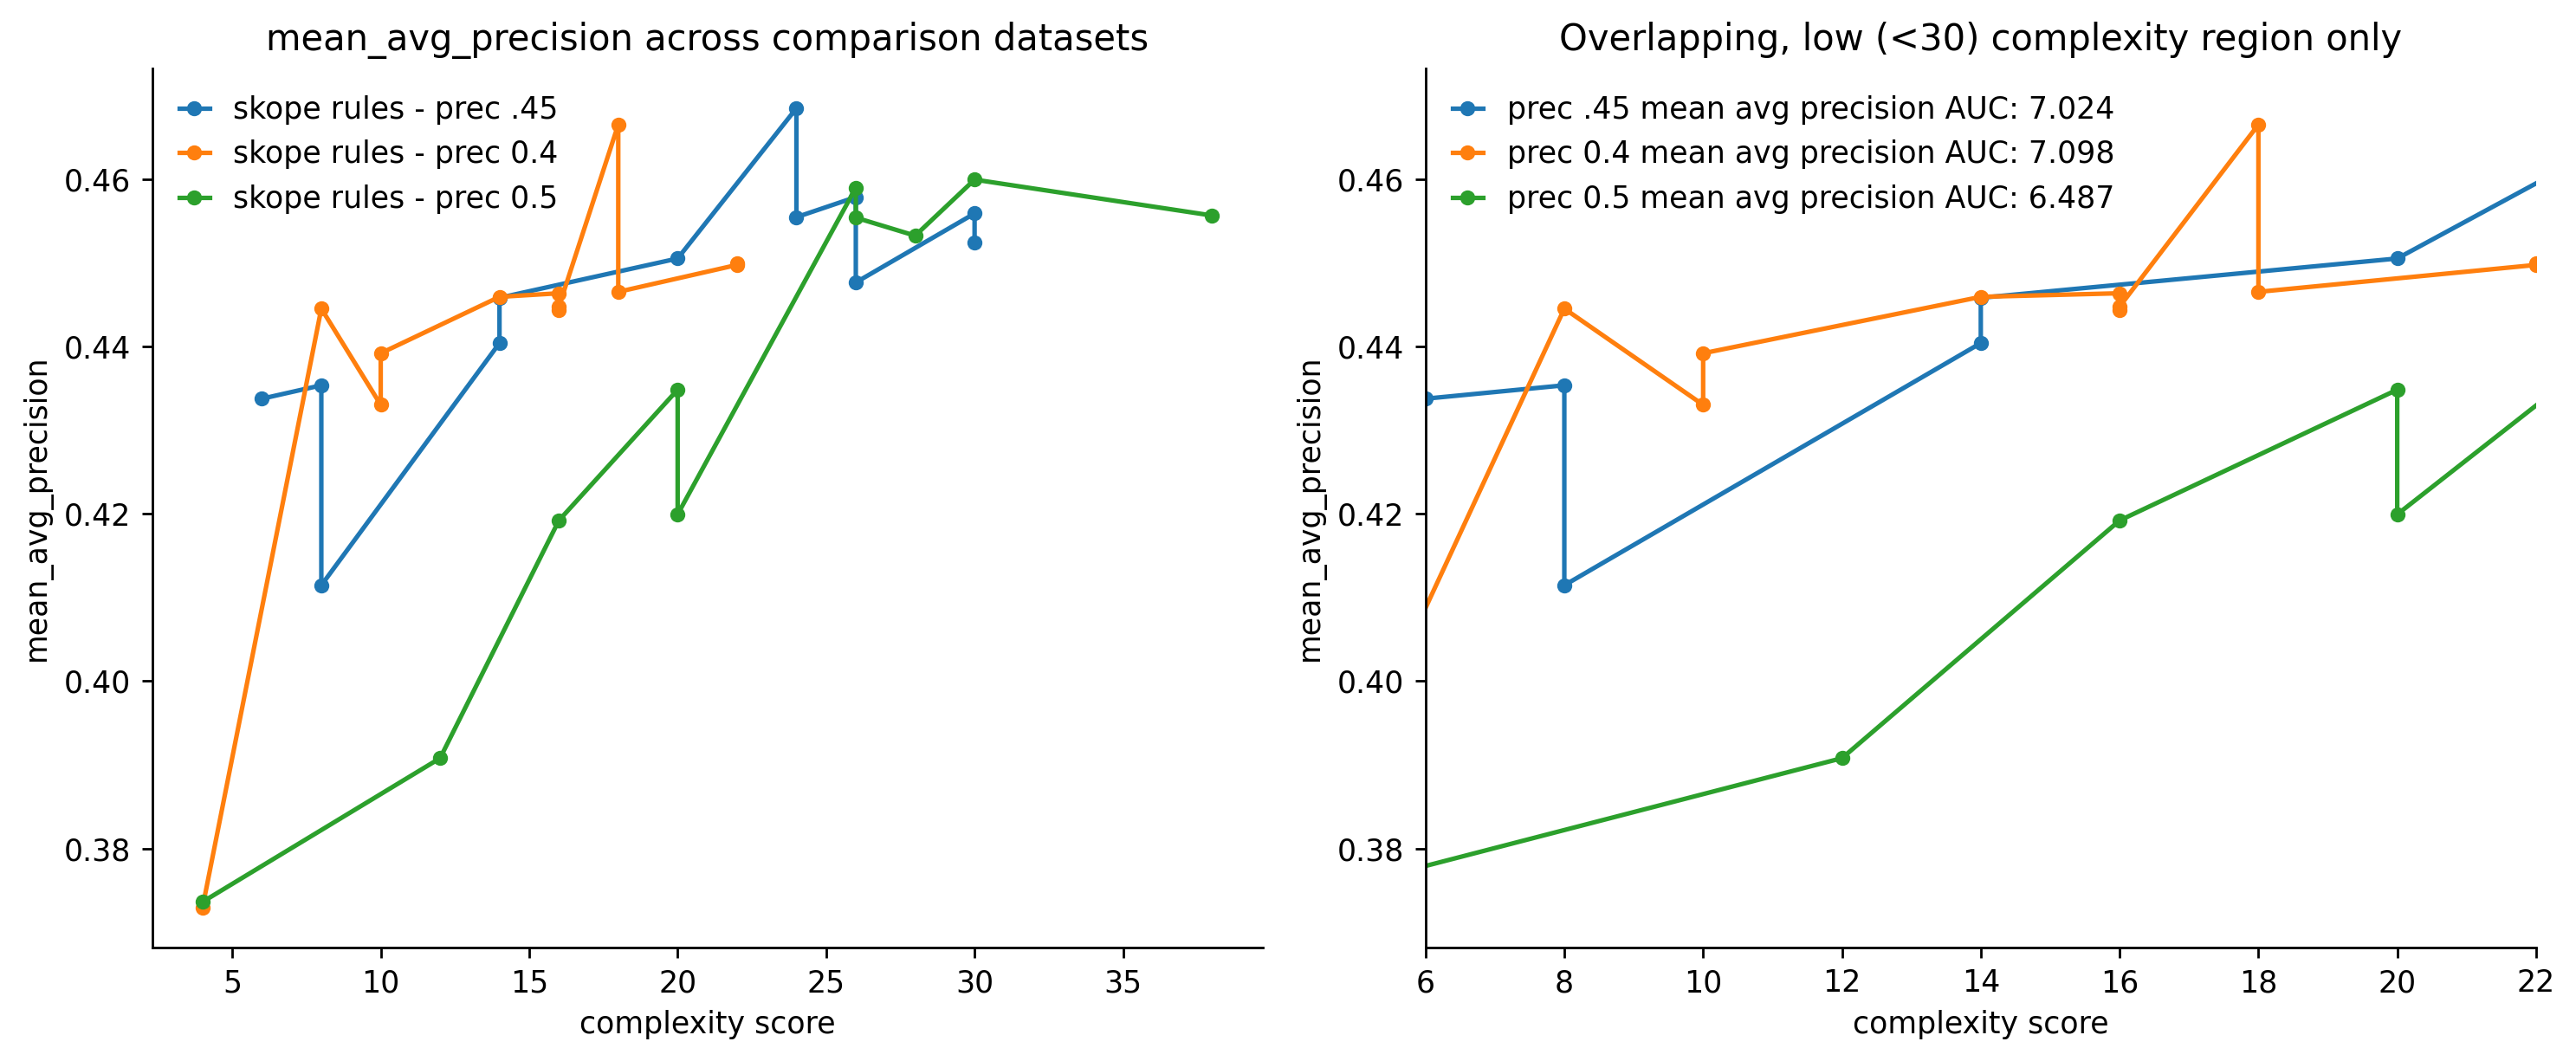

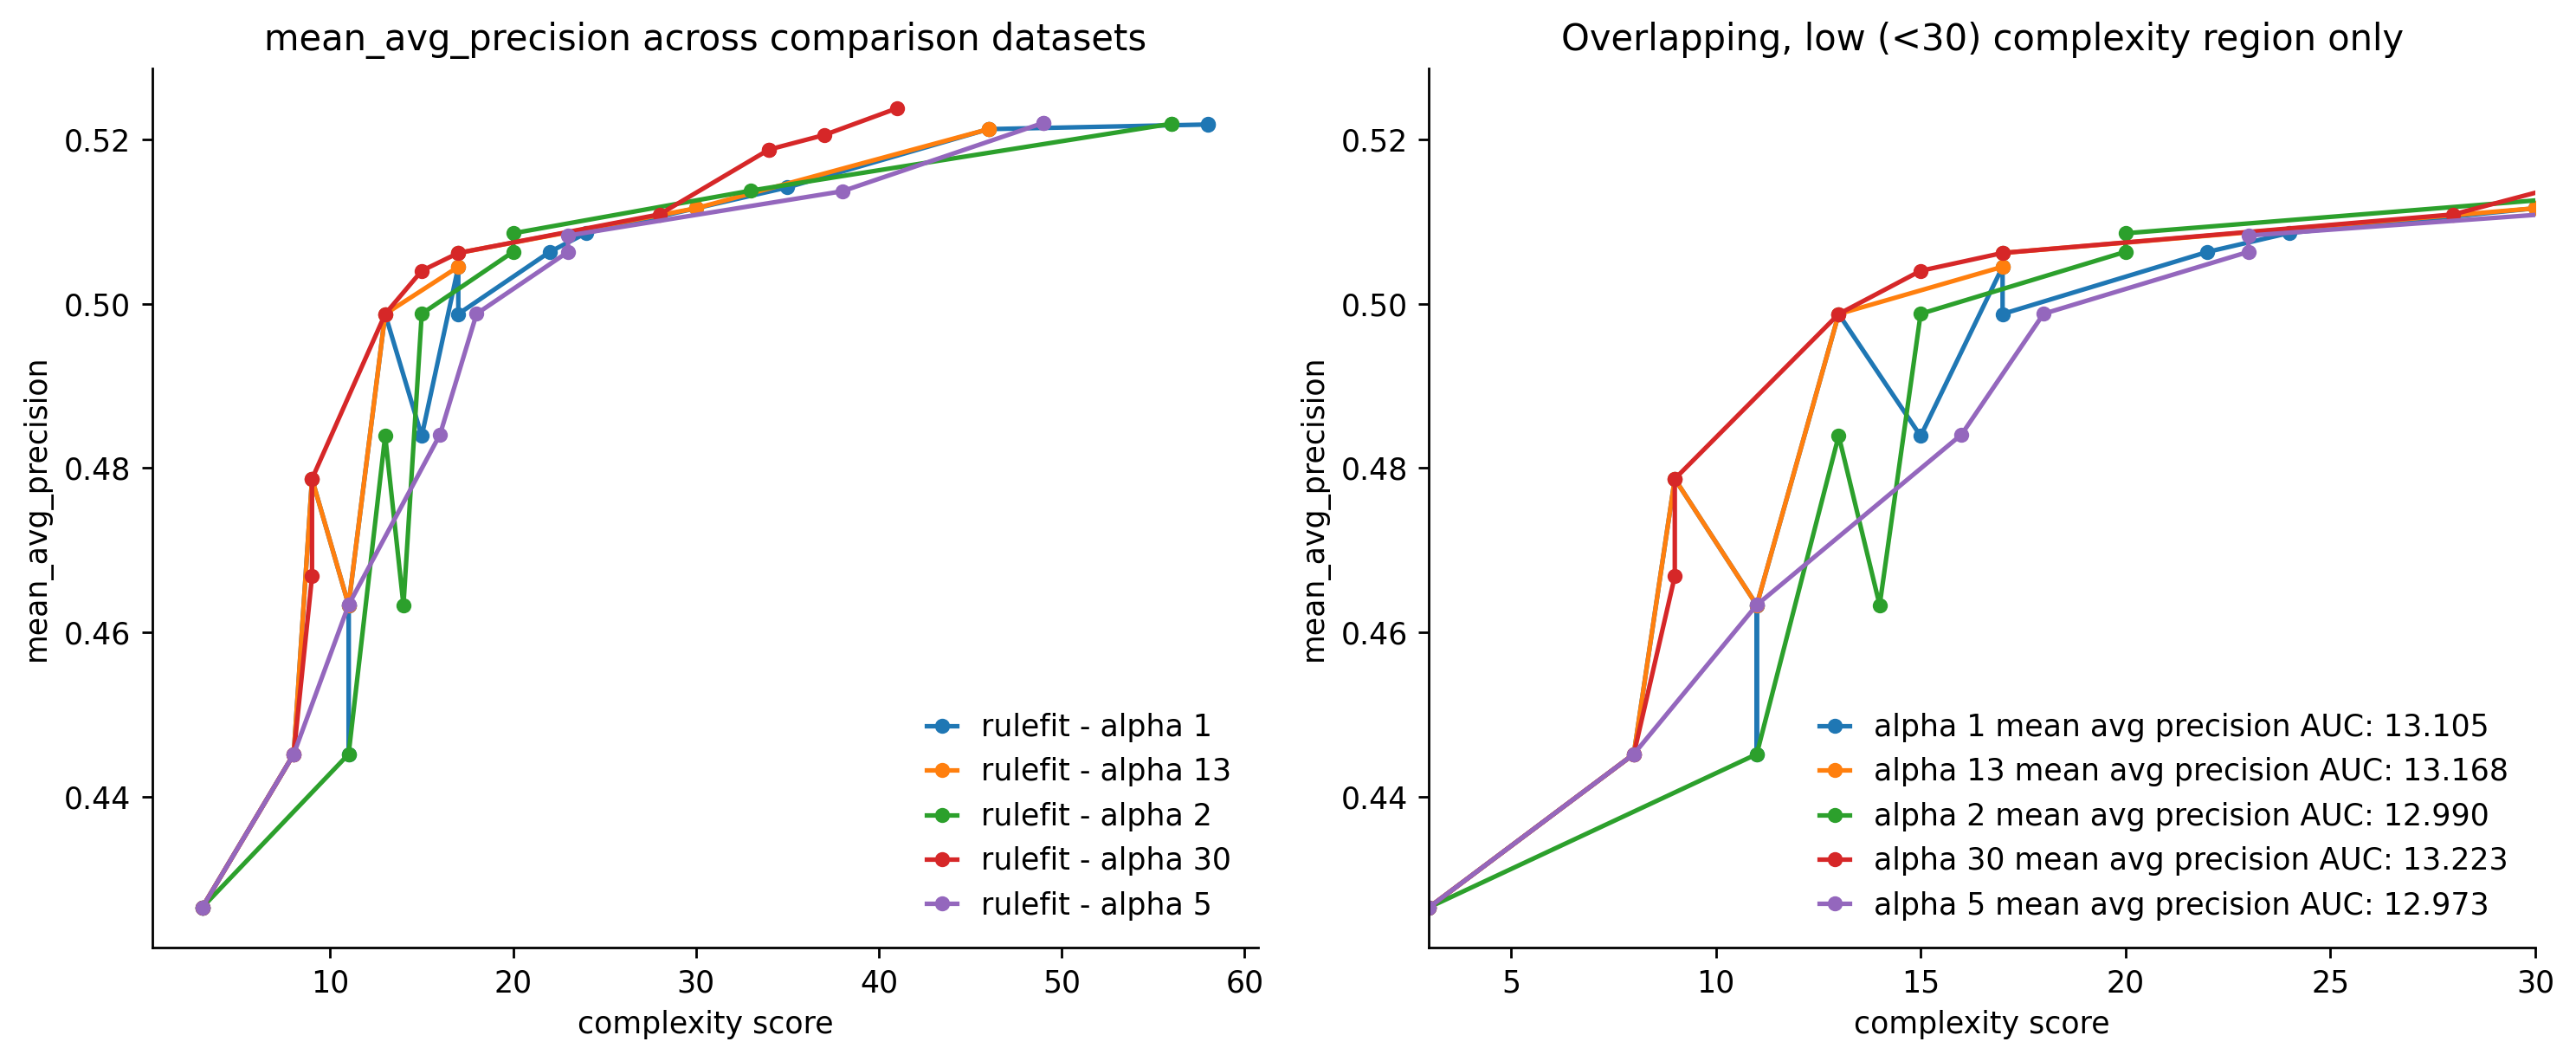

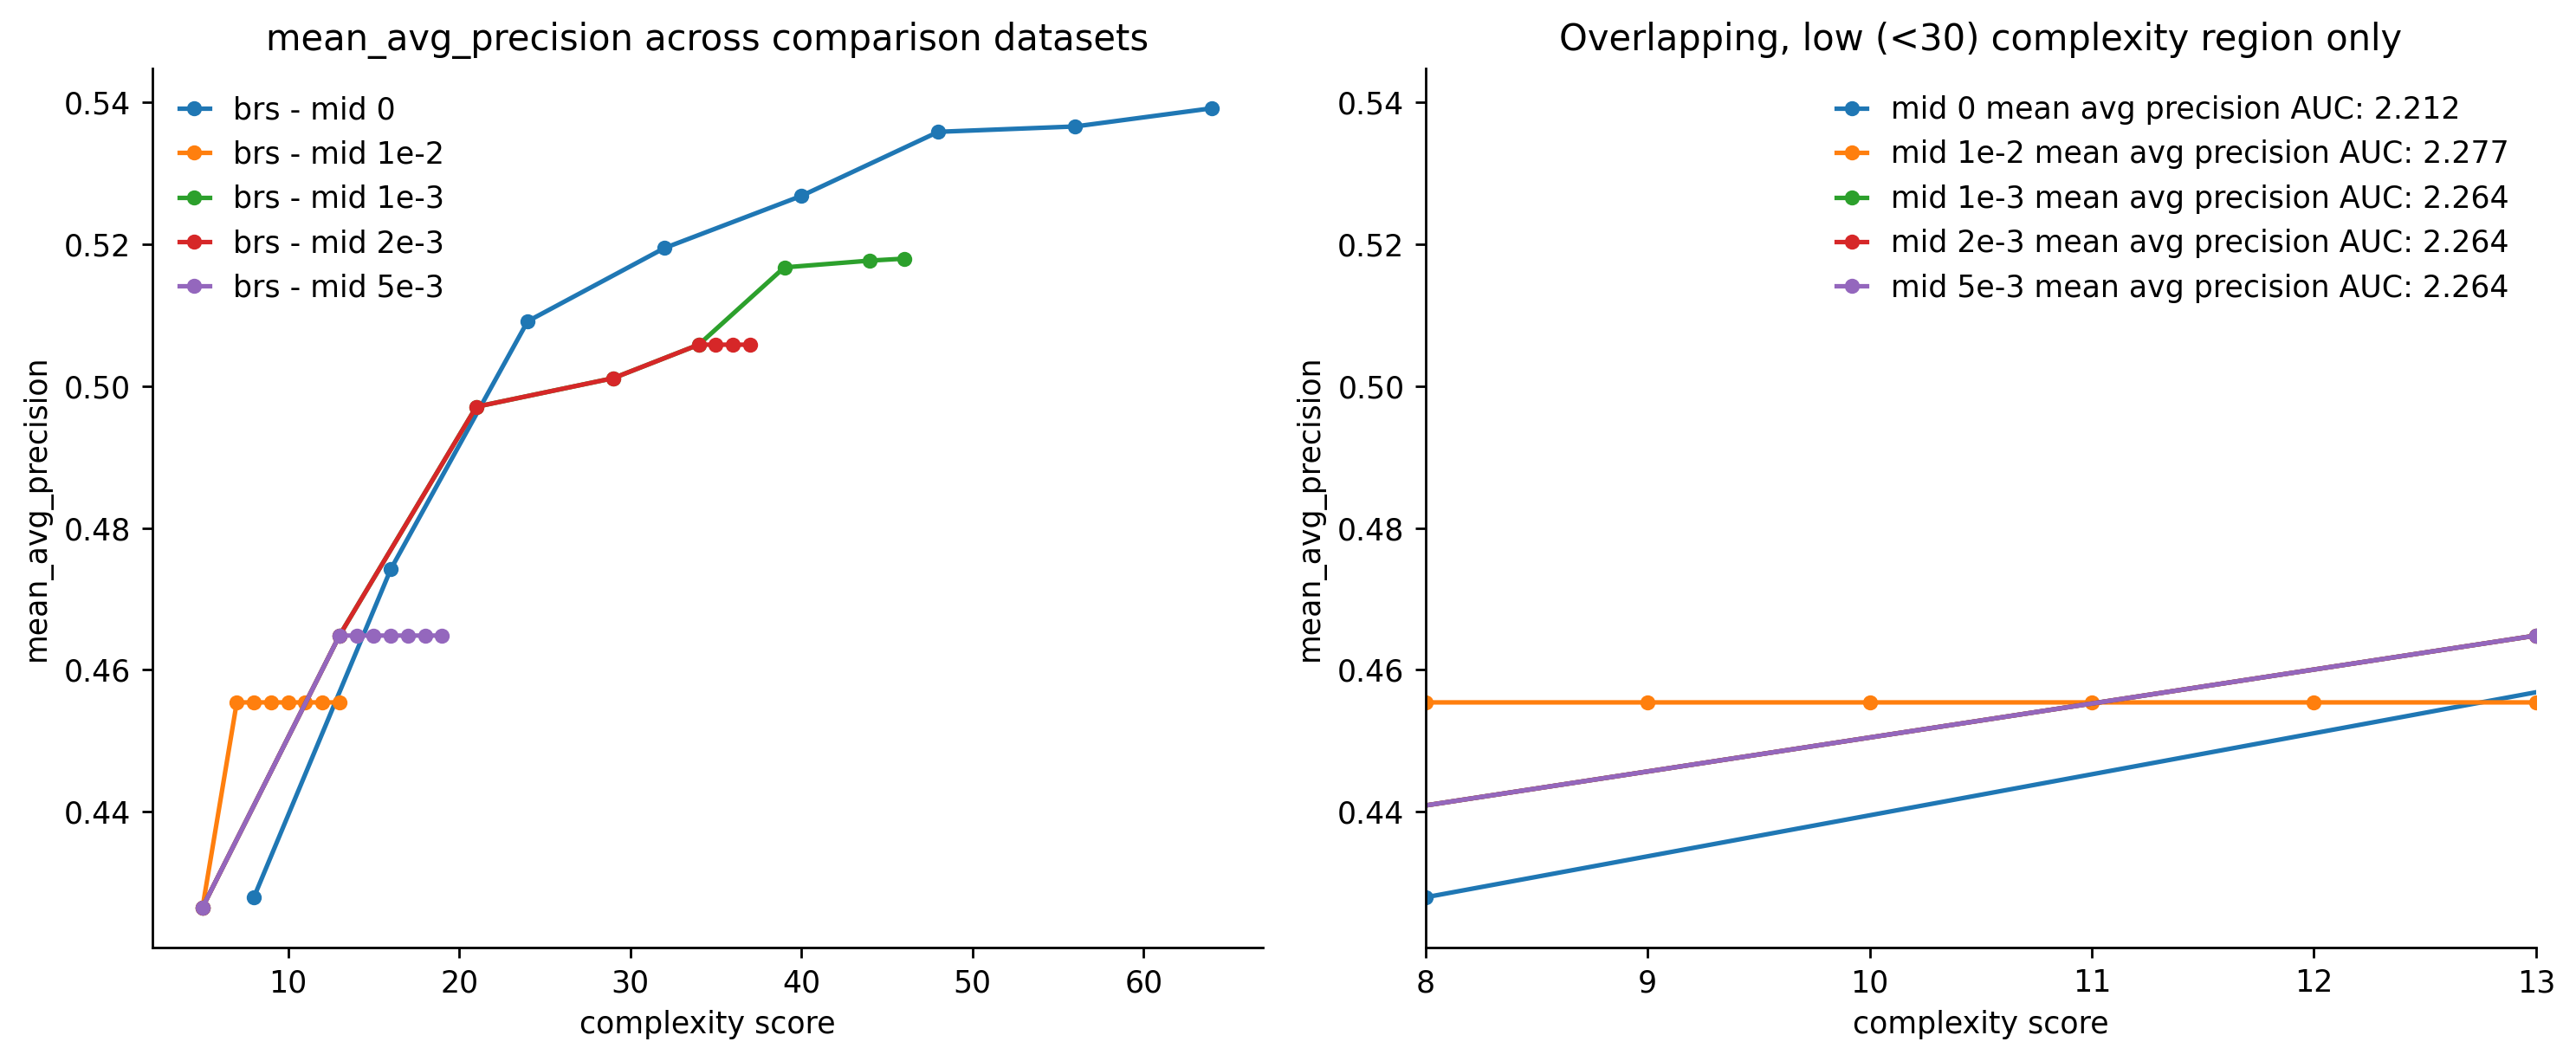

In [1082]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'brs']#'stbl_l2', 'stbl_l1', 'stbl_unlim_l1', 'stbl_unlim_fps_l1', 'fplasso', 'brl']
val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, 'credit') for mname in val_models]
for result in val_results:
    viz.viz_comparison_val_average(result, metric='mean_avg_precision')
    plt.show()

# validation plots - recidivism

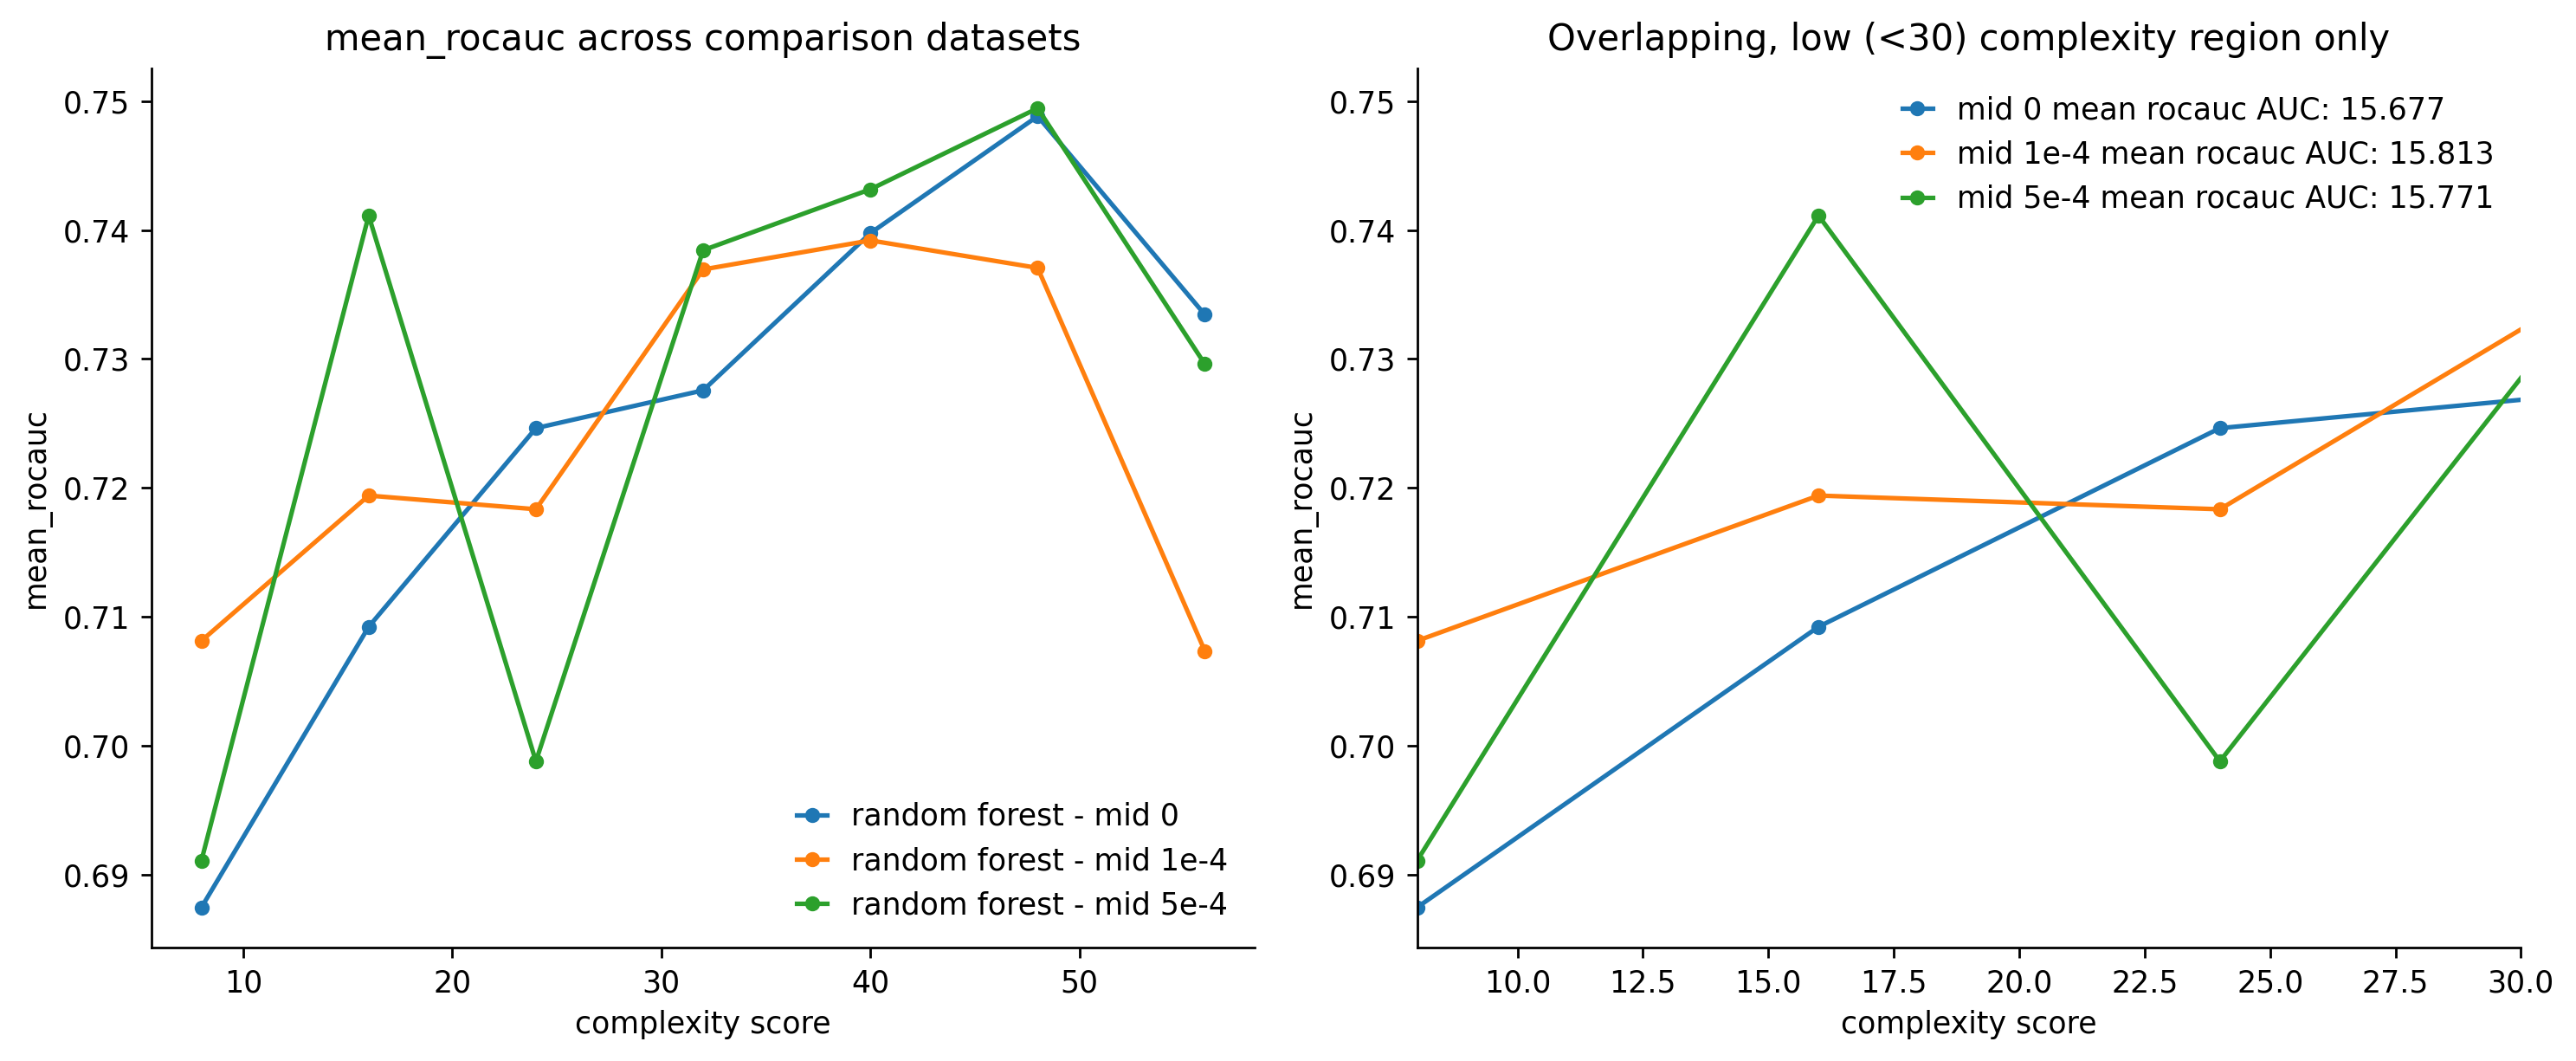

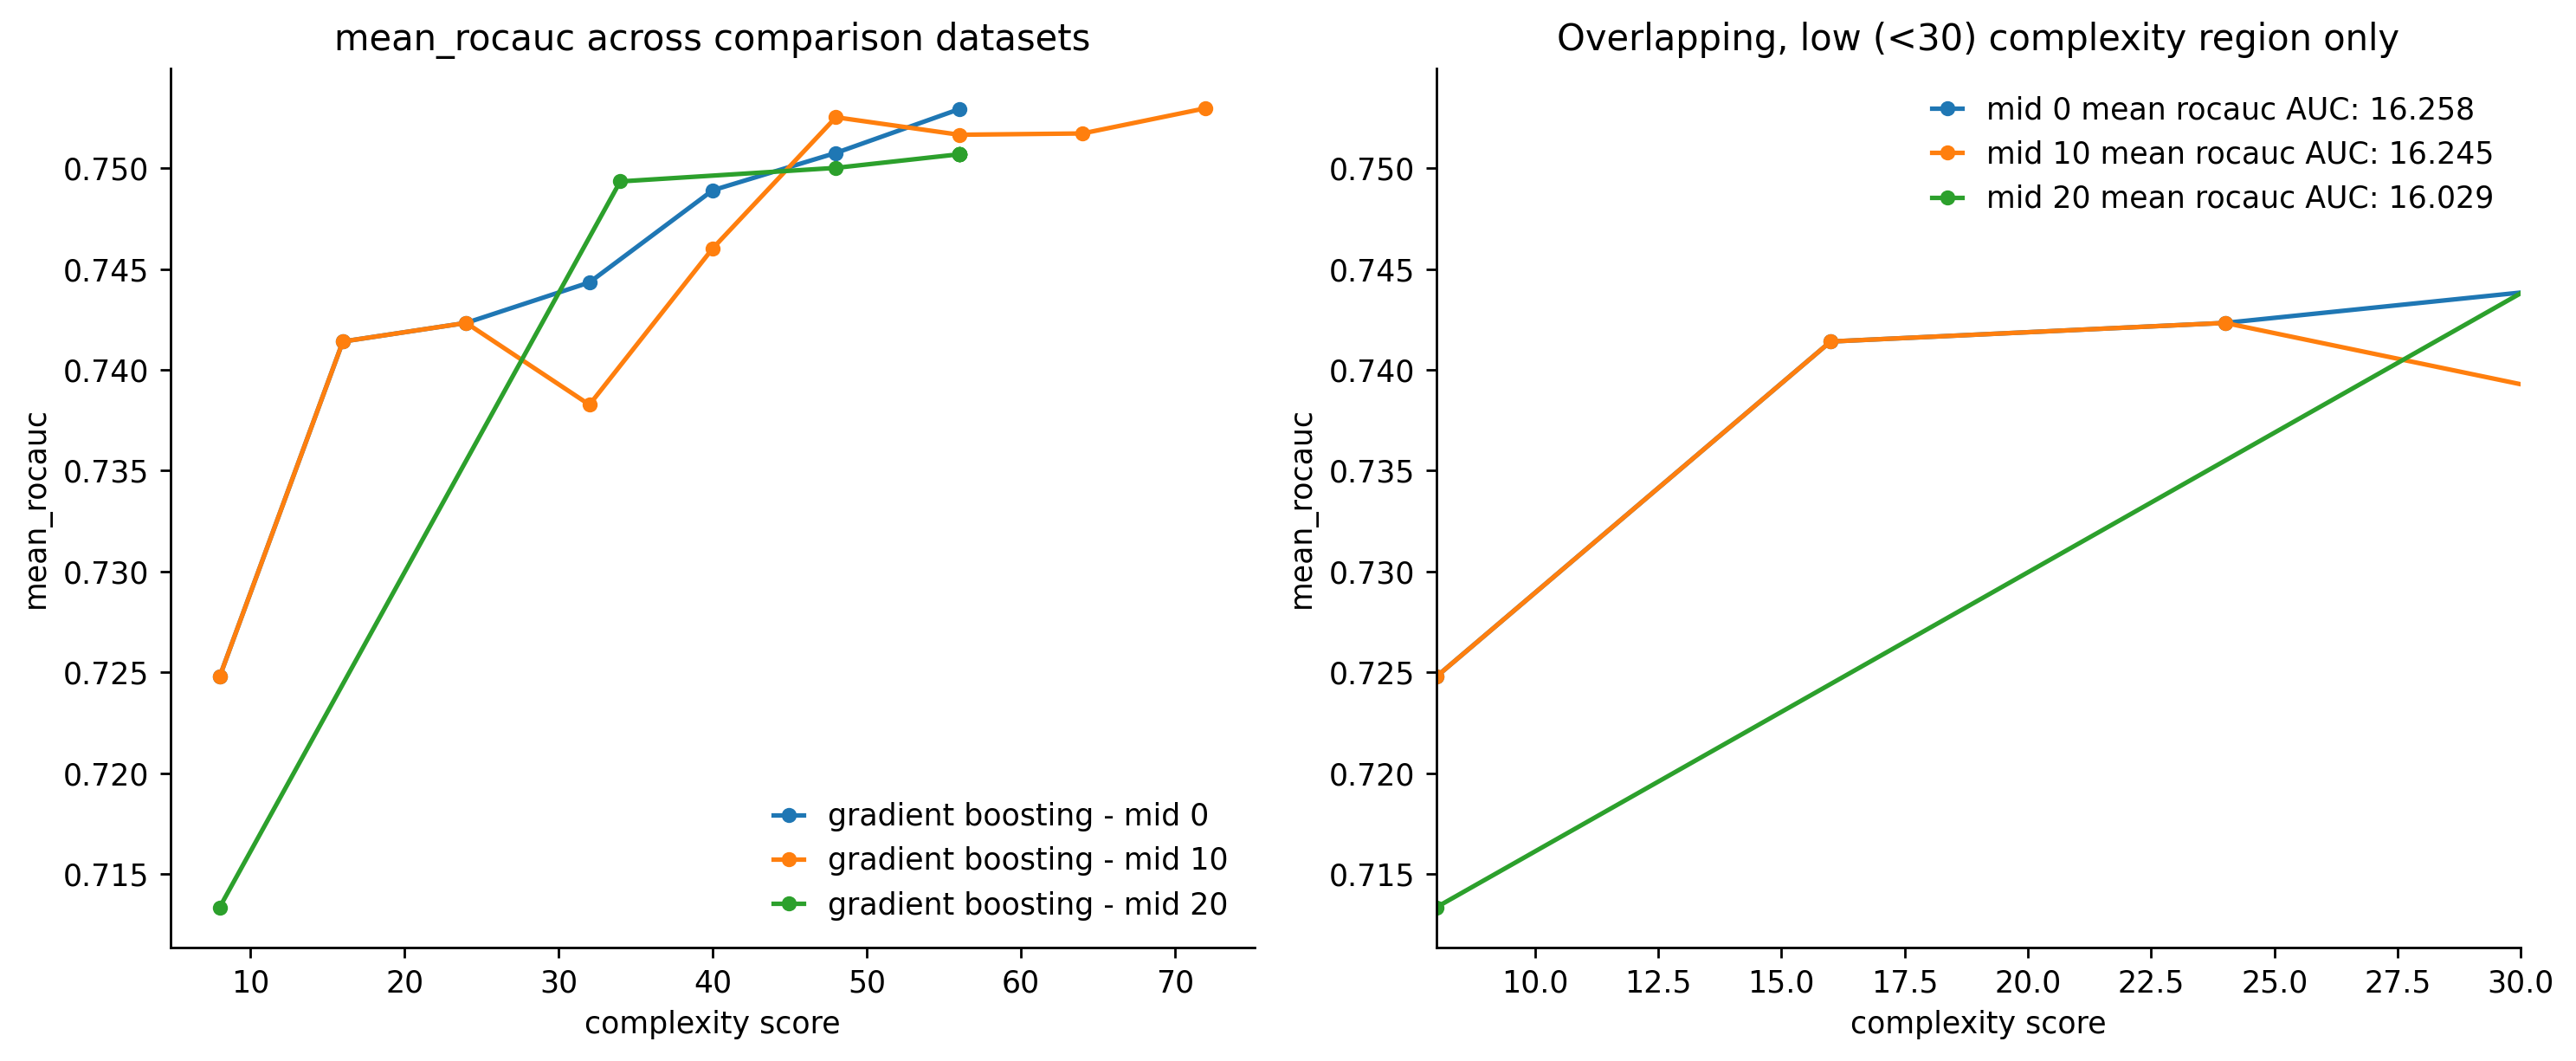

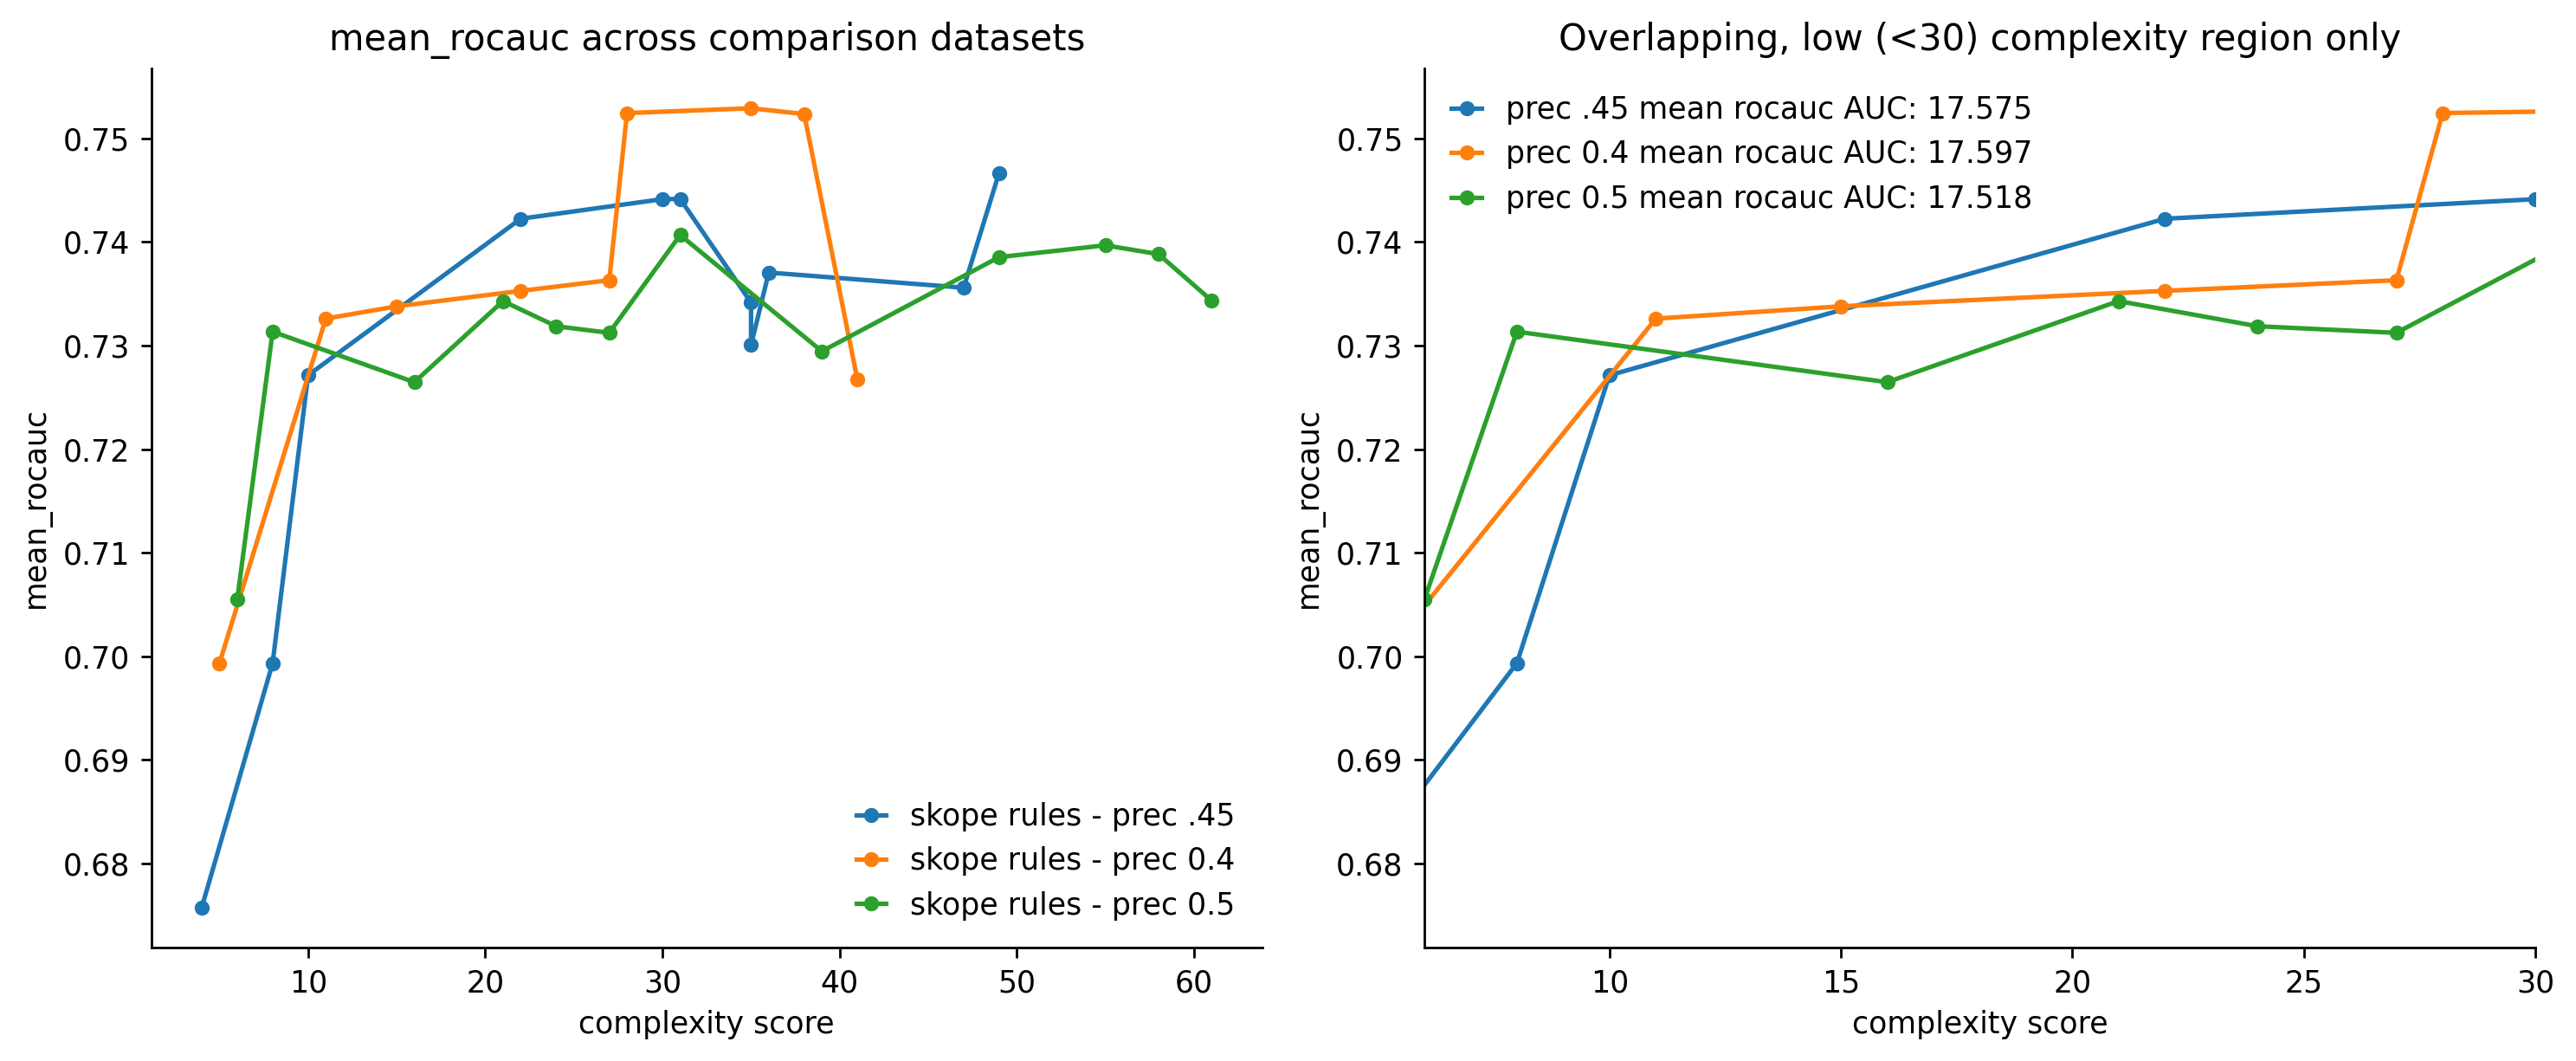

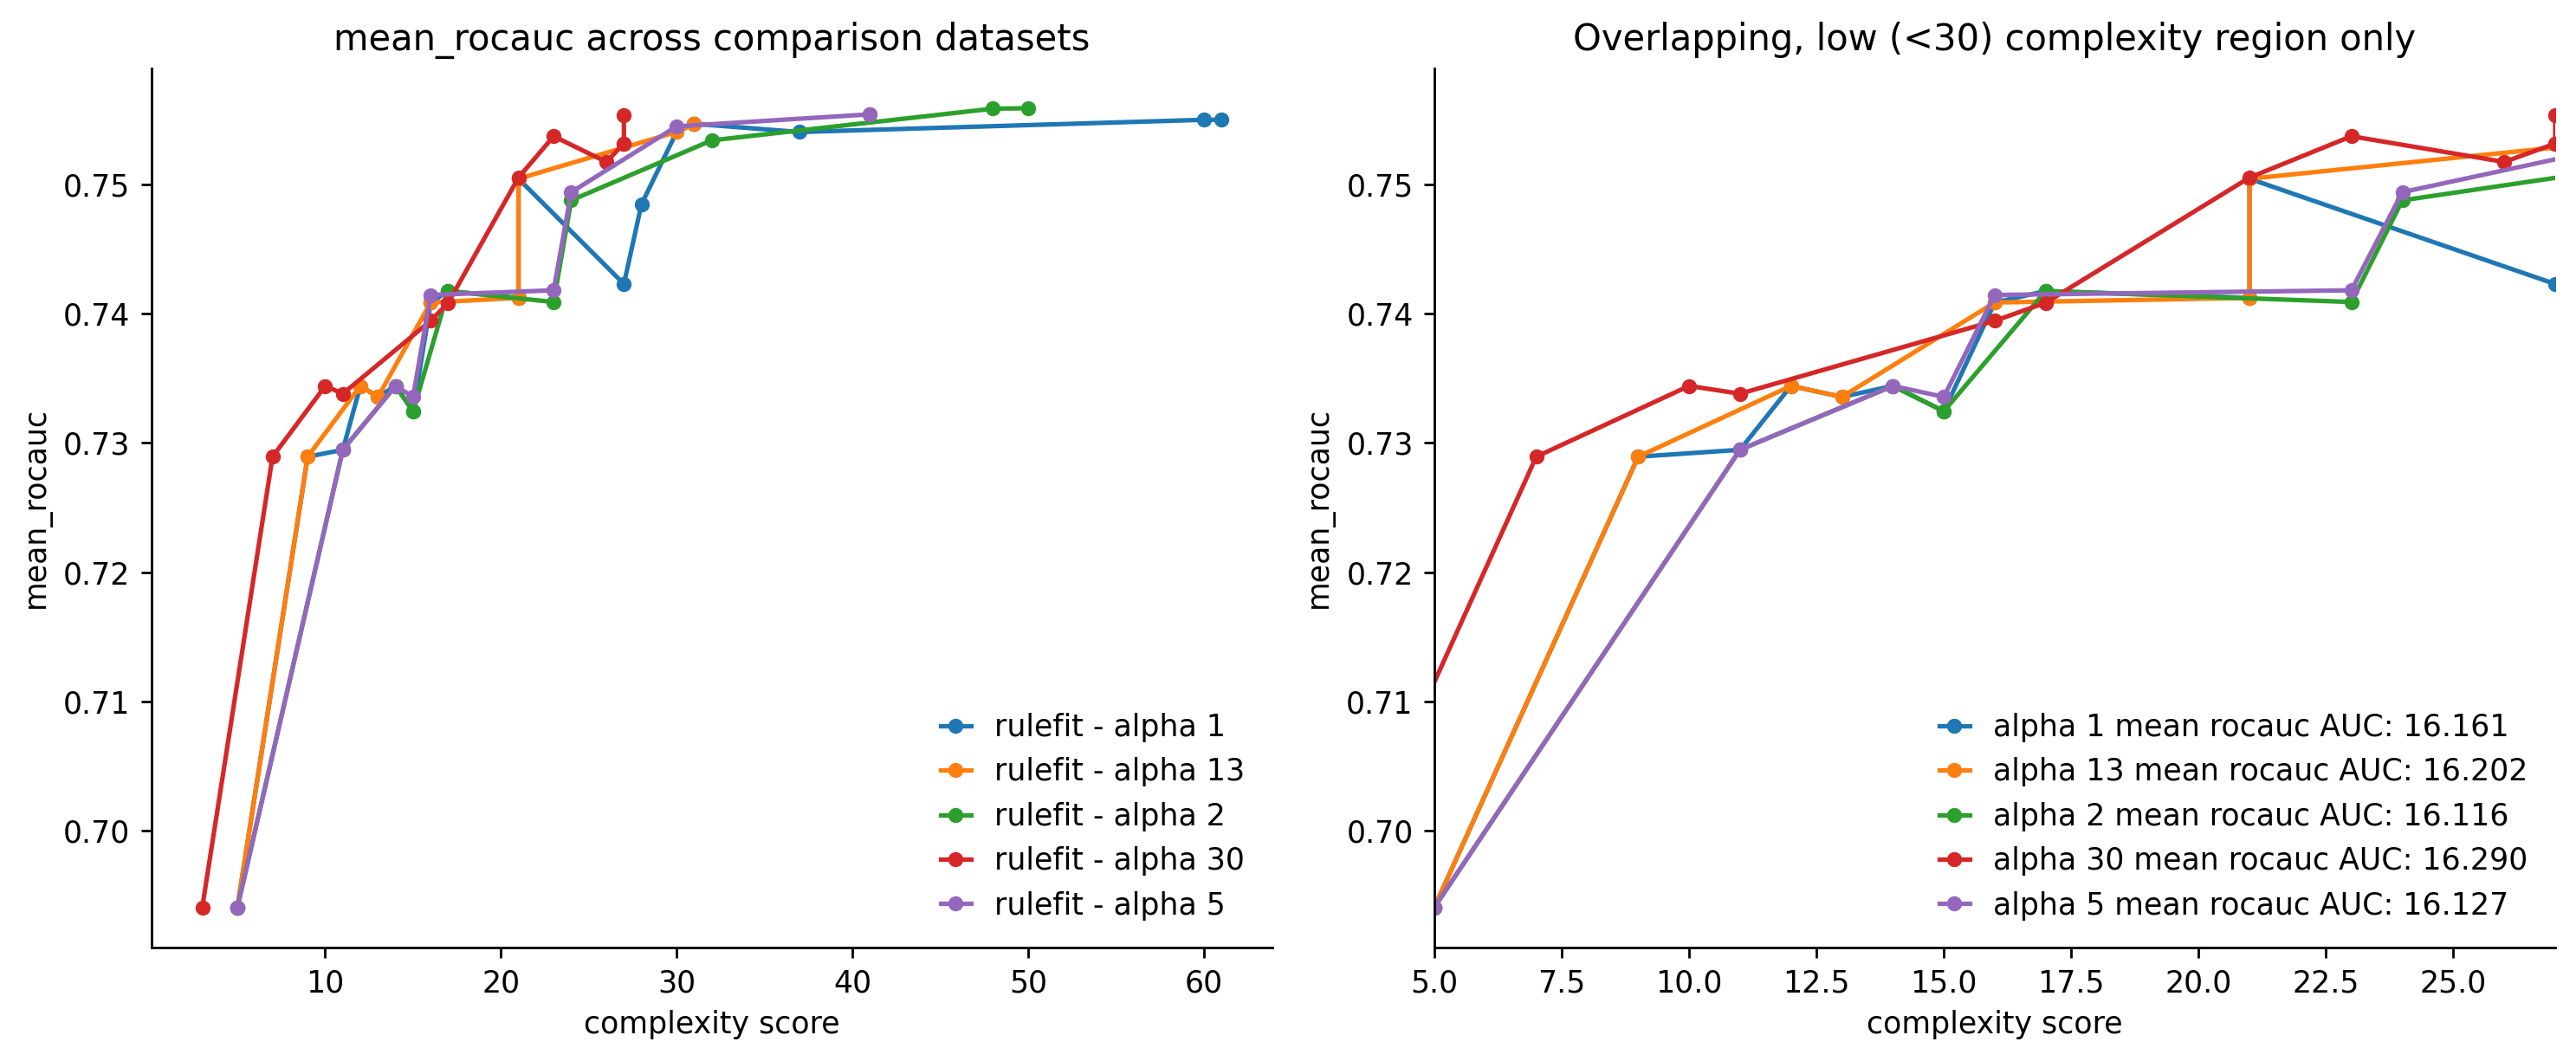

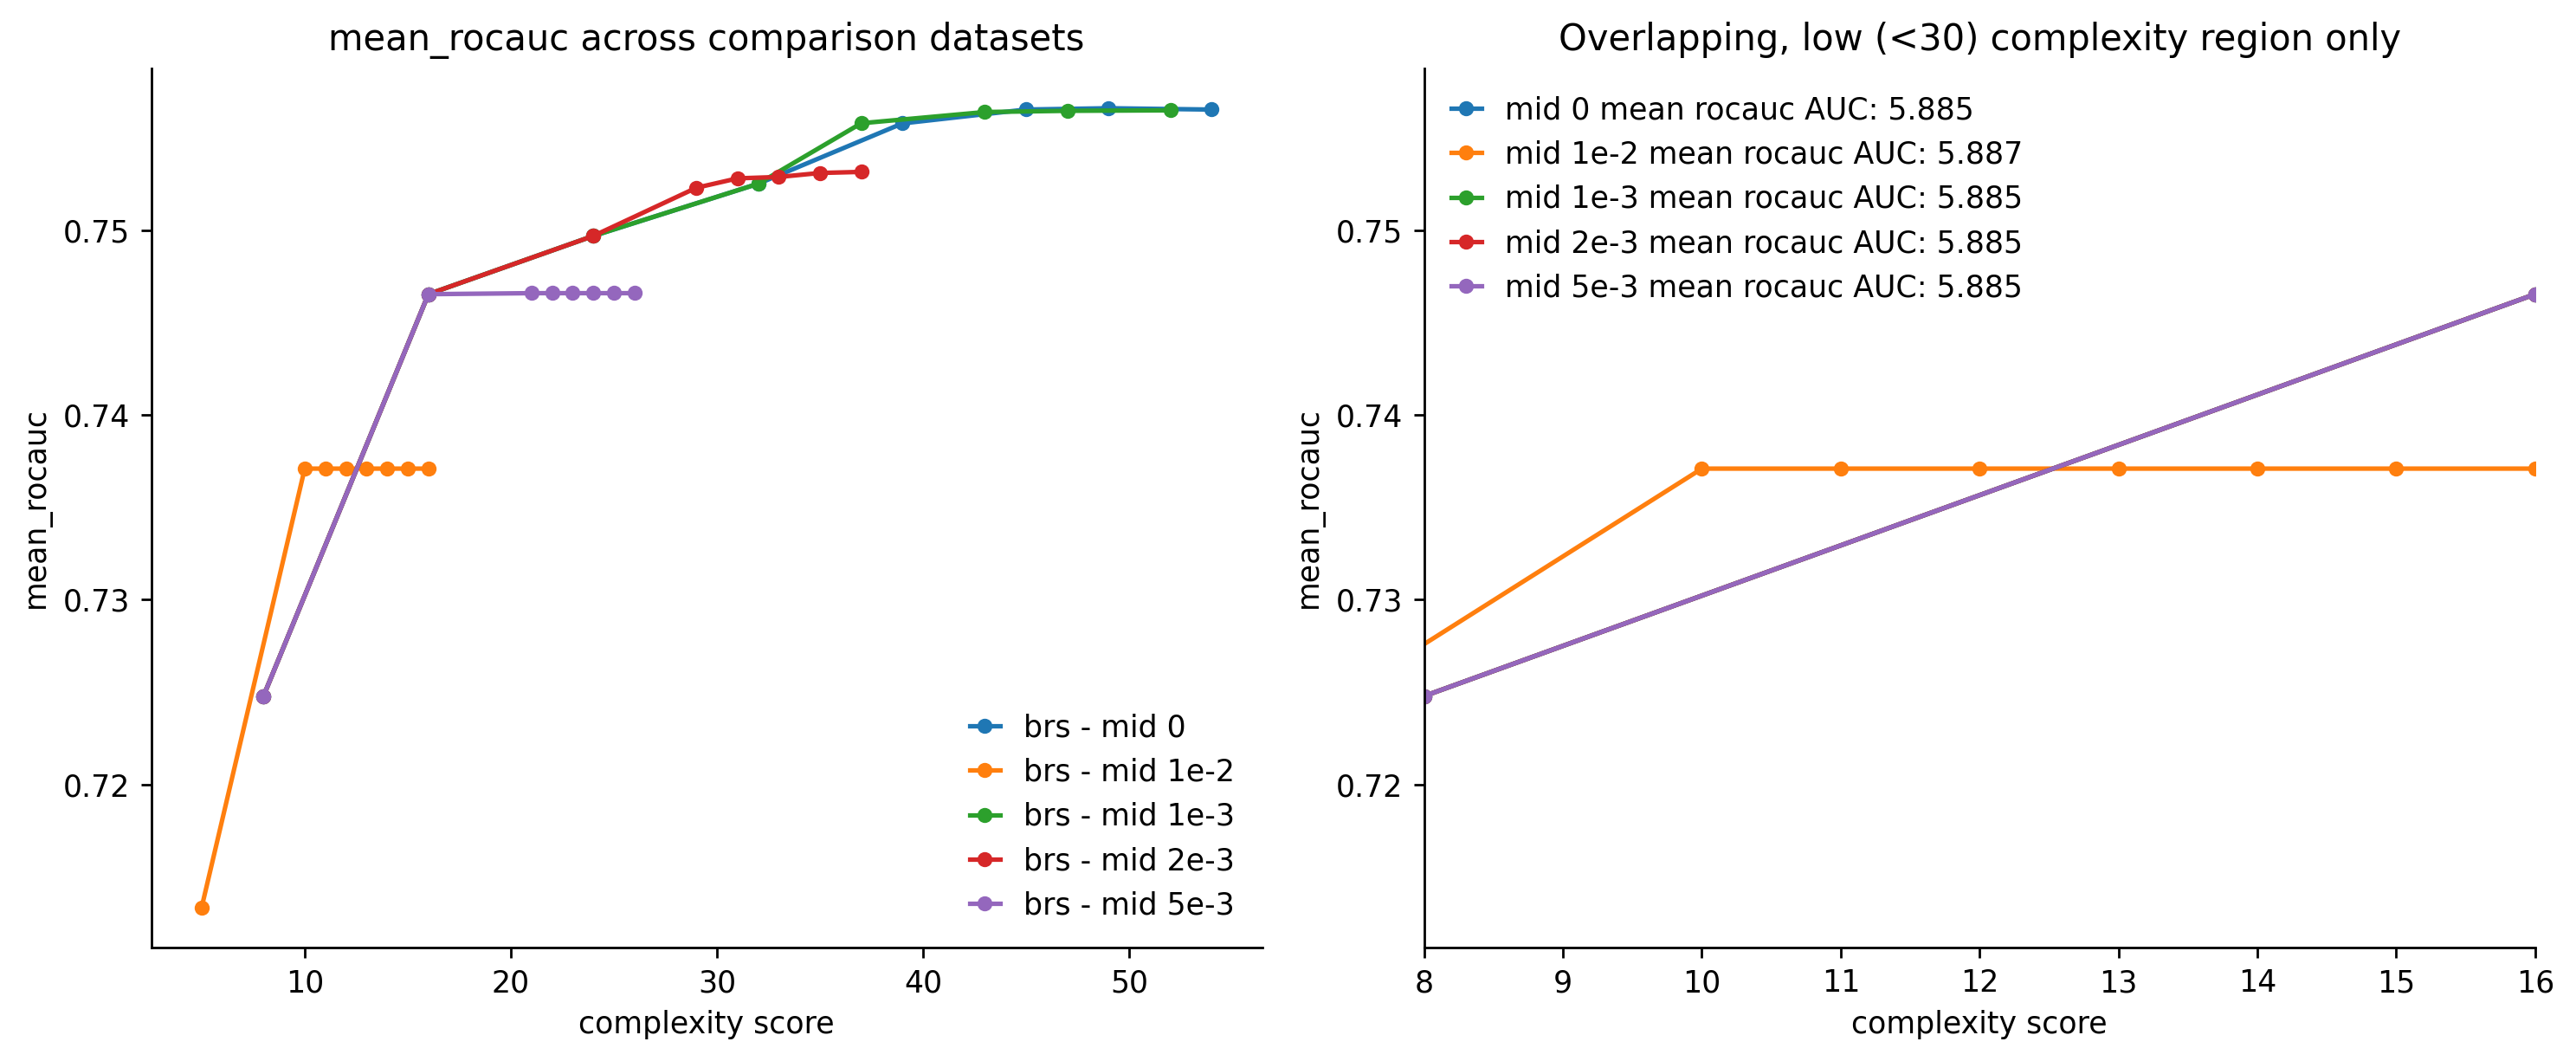

In [1088]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'brs']#'stbl_l2', 'stbl_l1', 'stbl_unlim_l1', 'stbl_unlim_fps_l1', 'fplasso', 'brl']
val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, 'recidivism') for mname in val_models]
for result in val_results:
    viz.viz_comparison_val_average(result, metric='mean_rocauc')
    plt.show()

# validation plots - juvenile

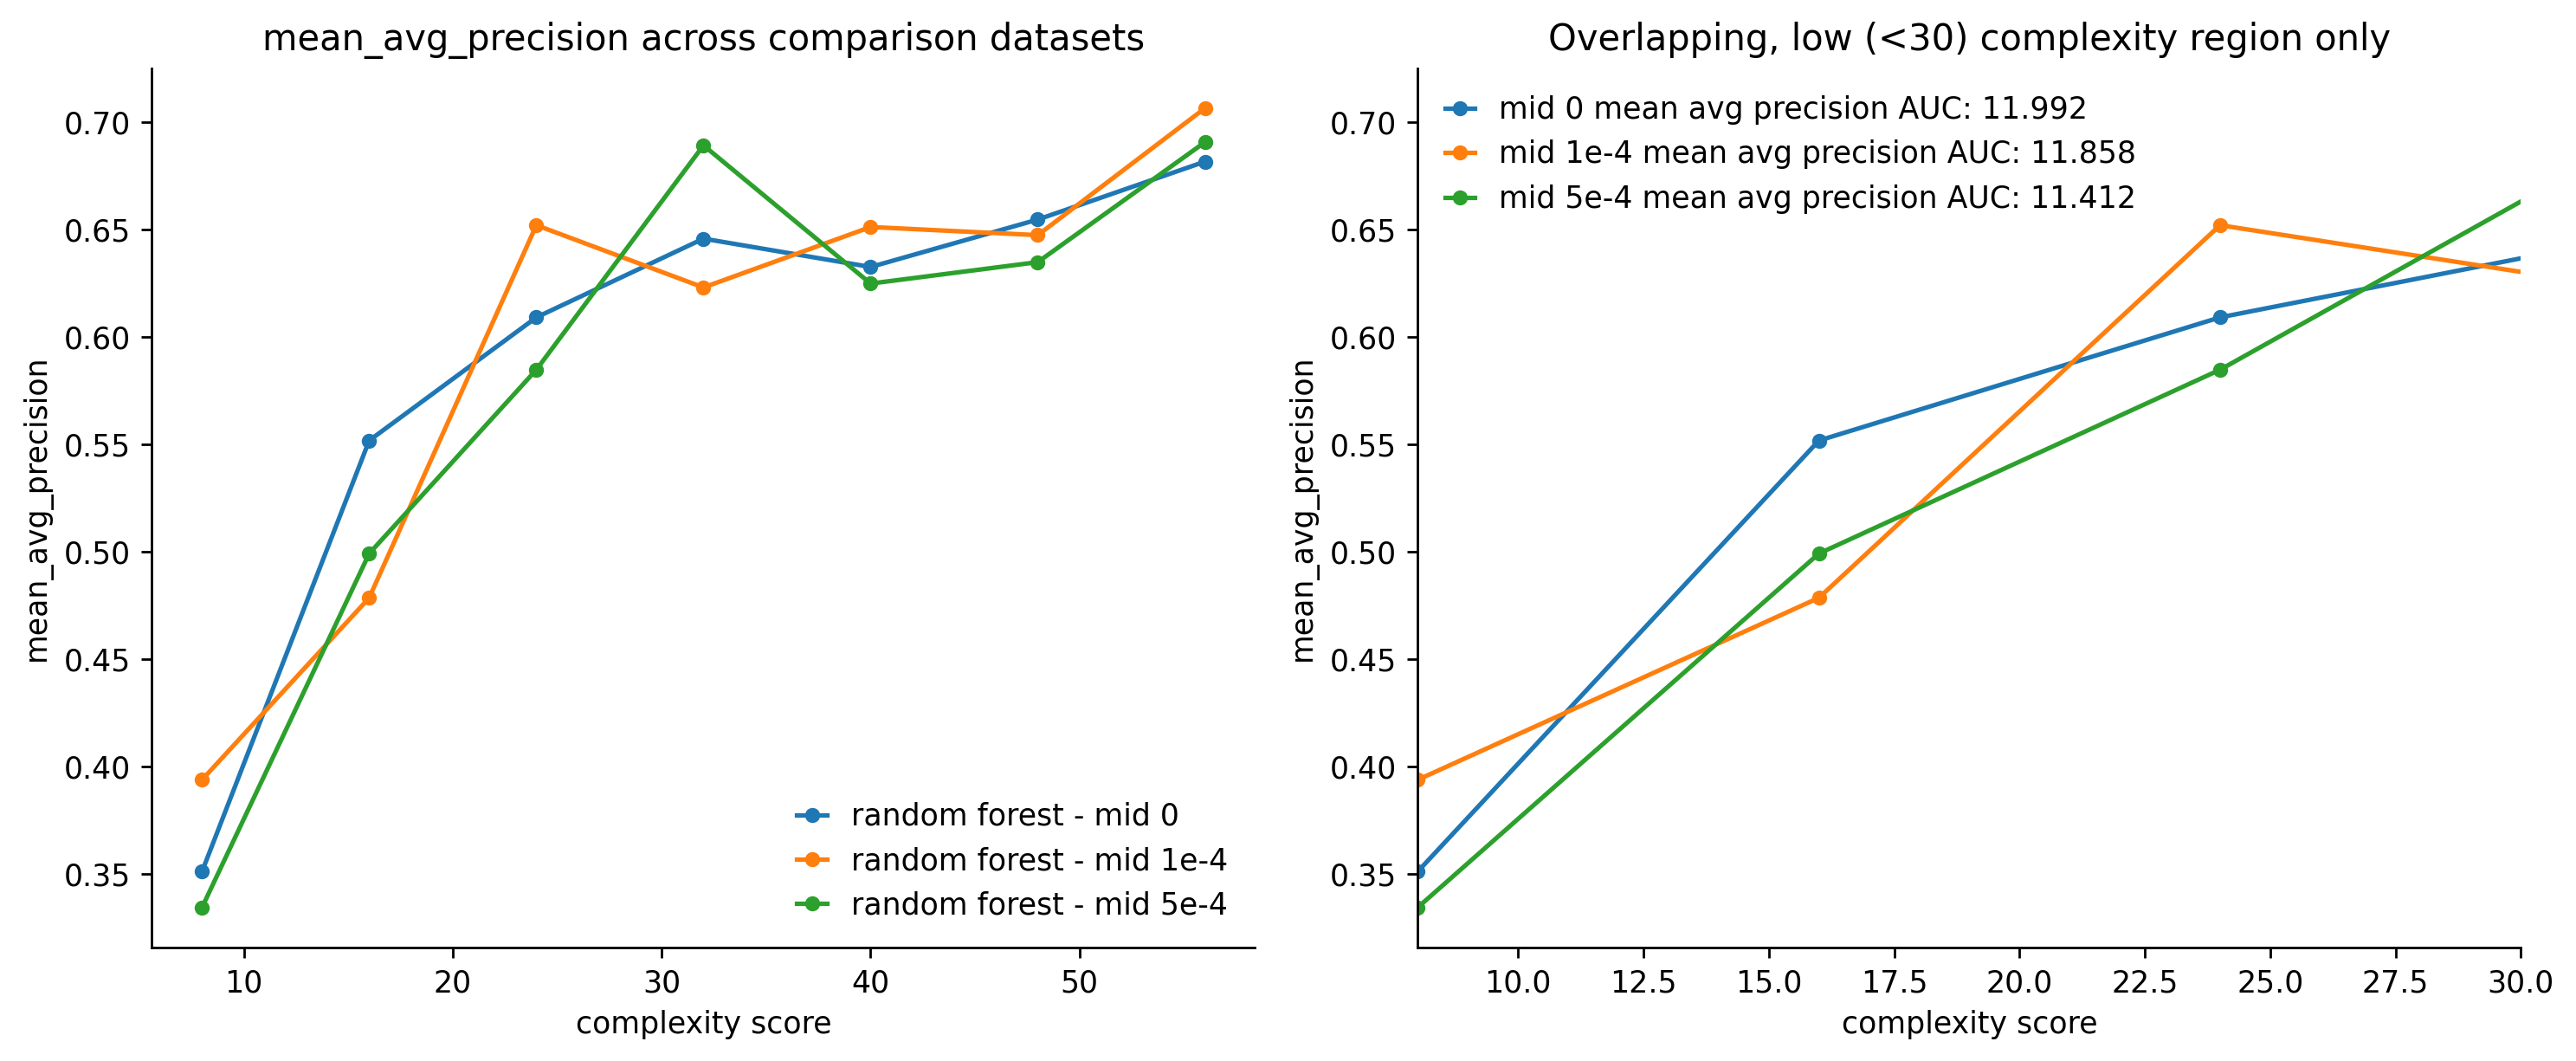

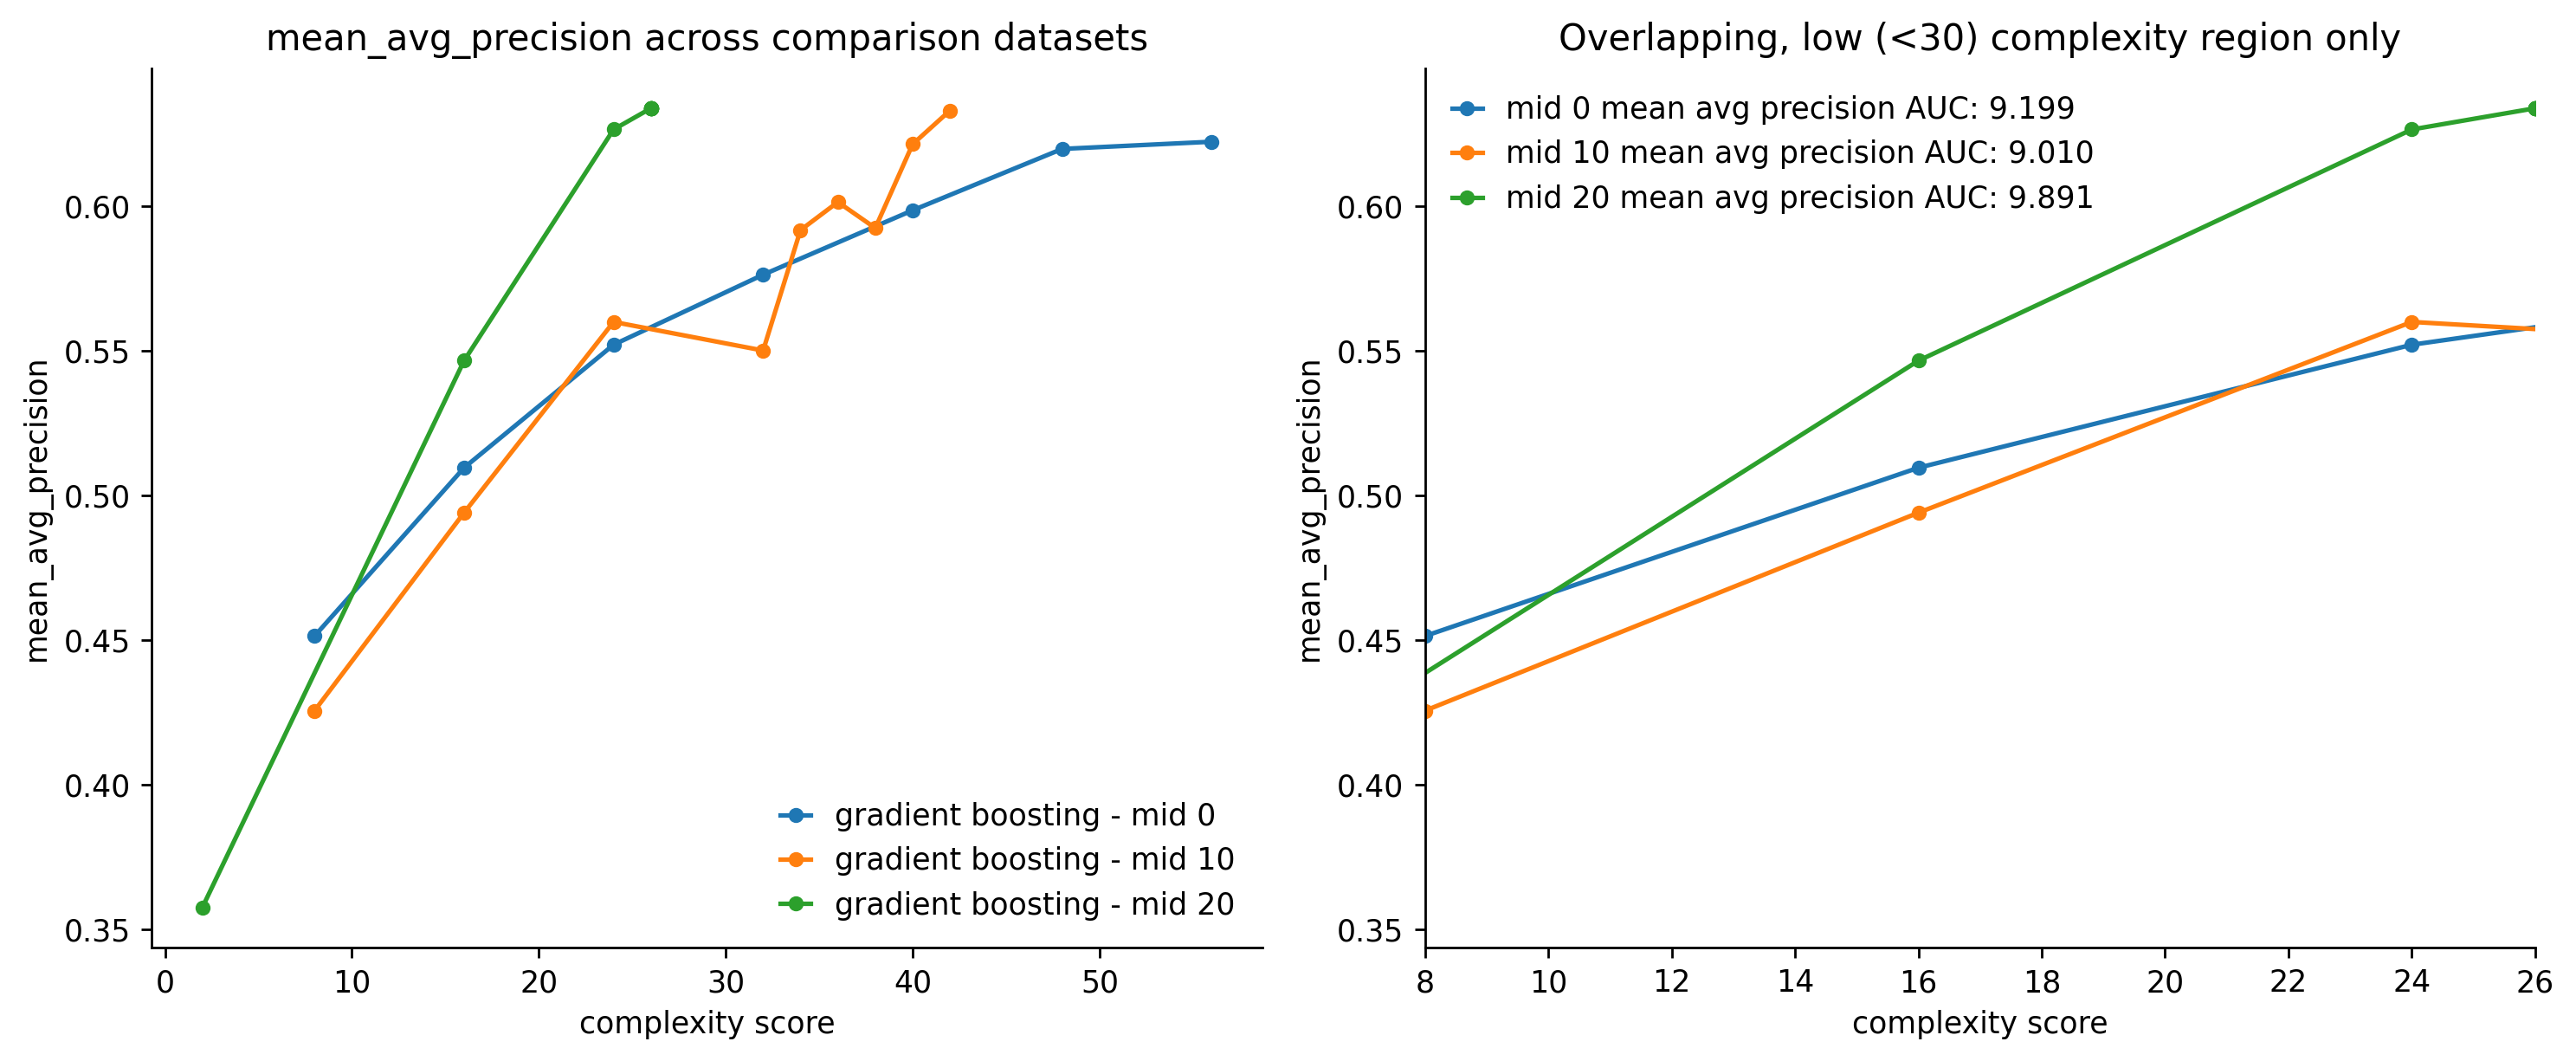

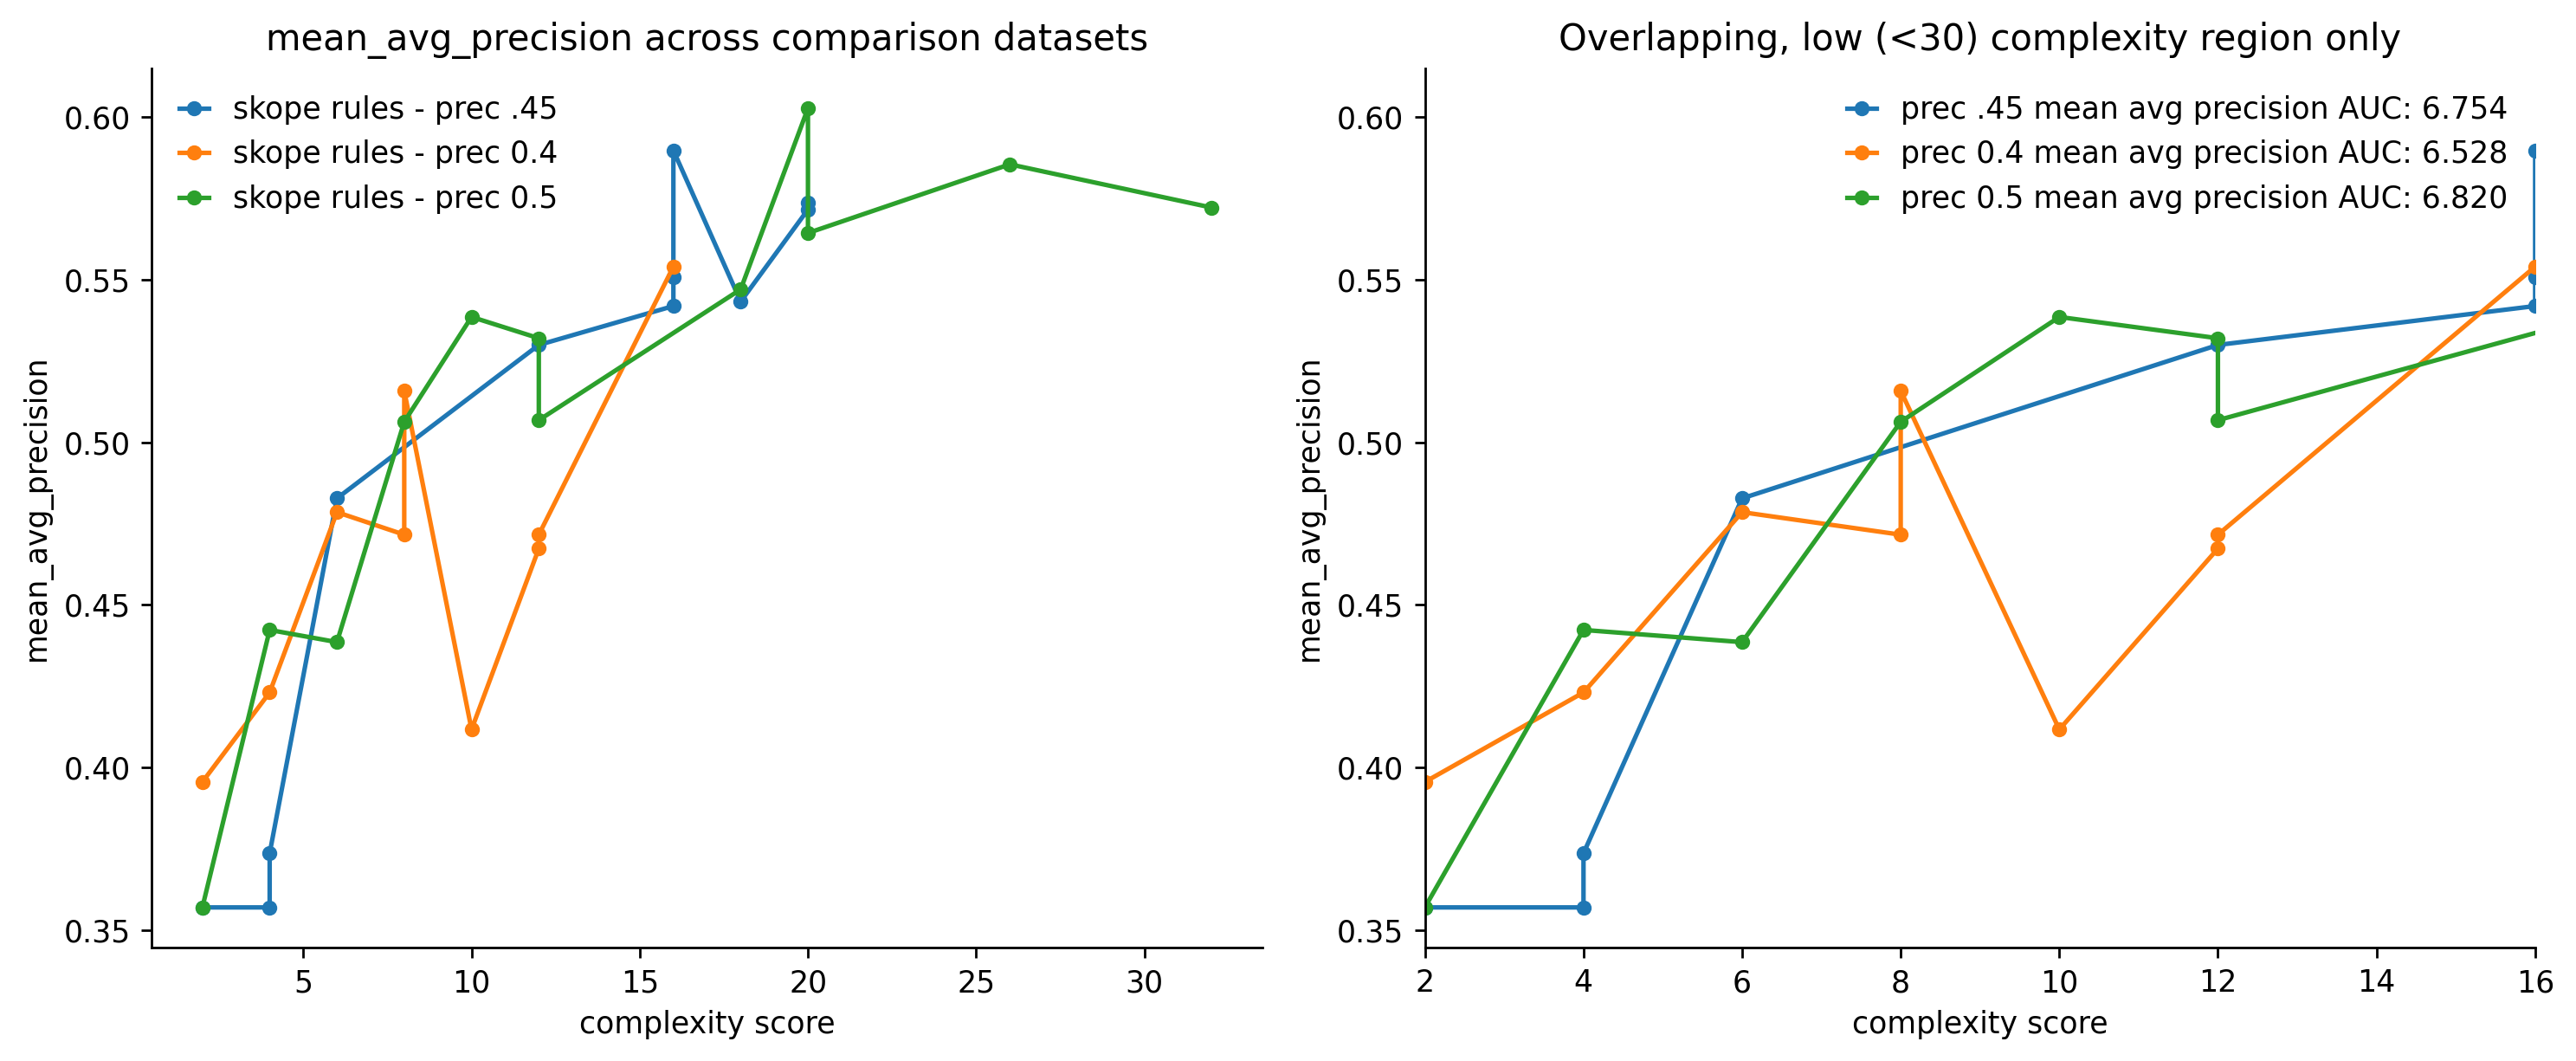

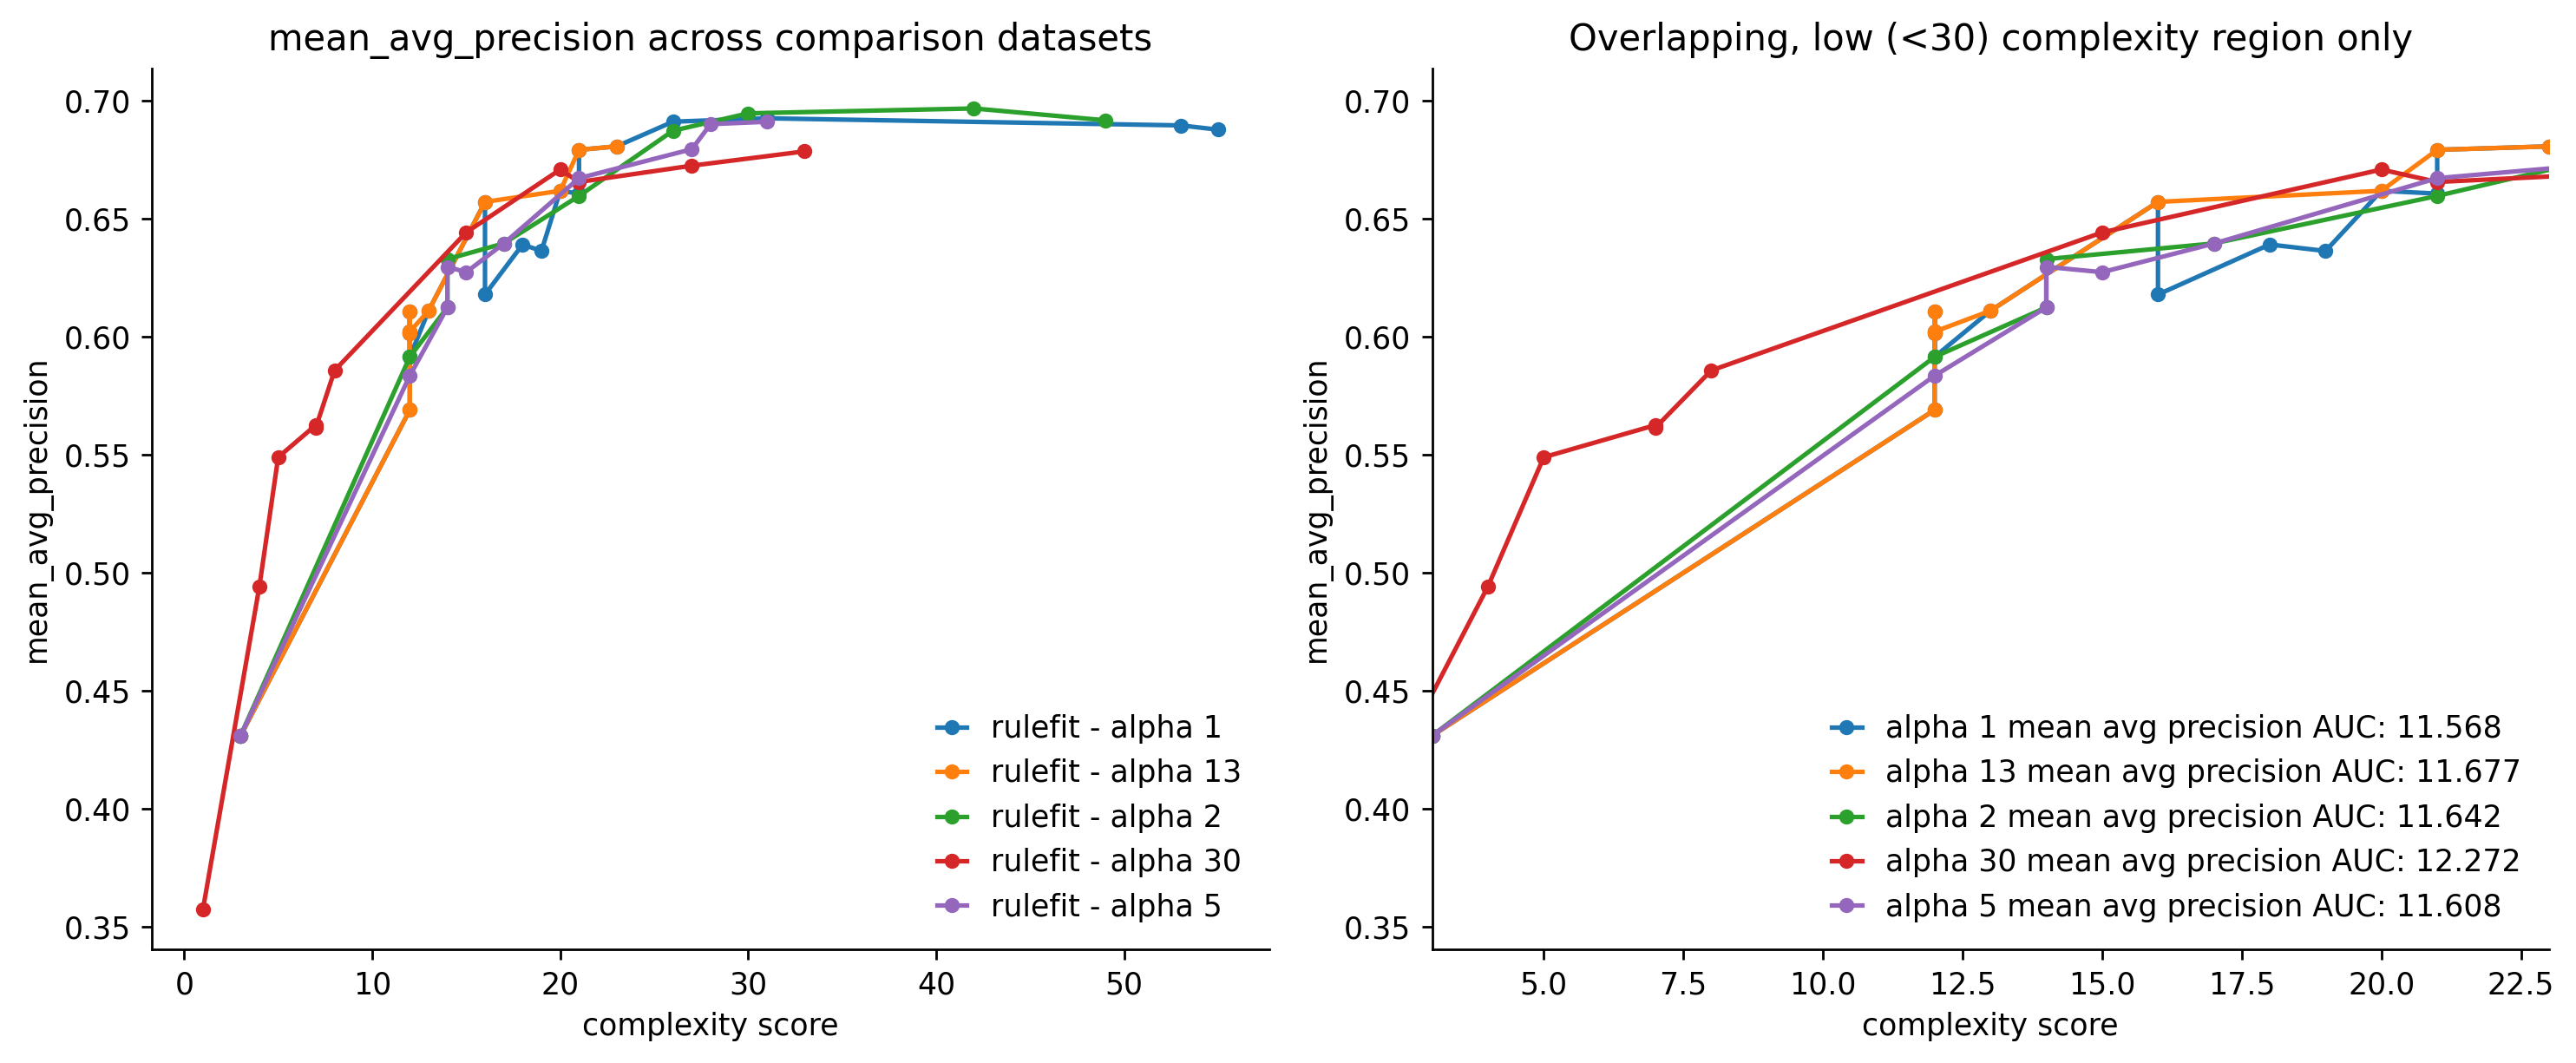

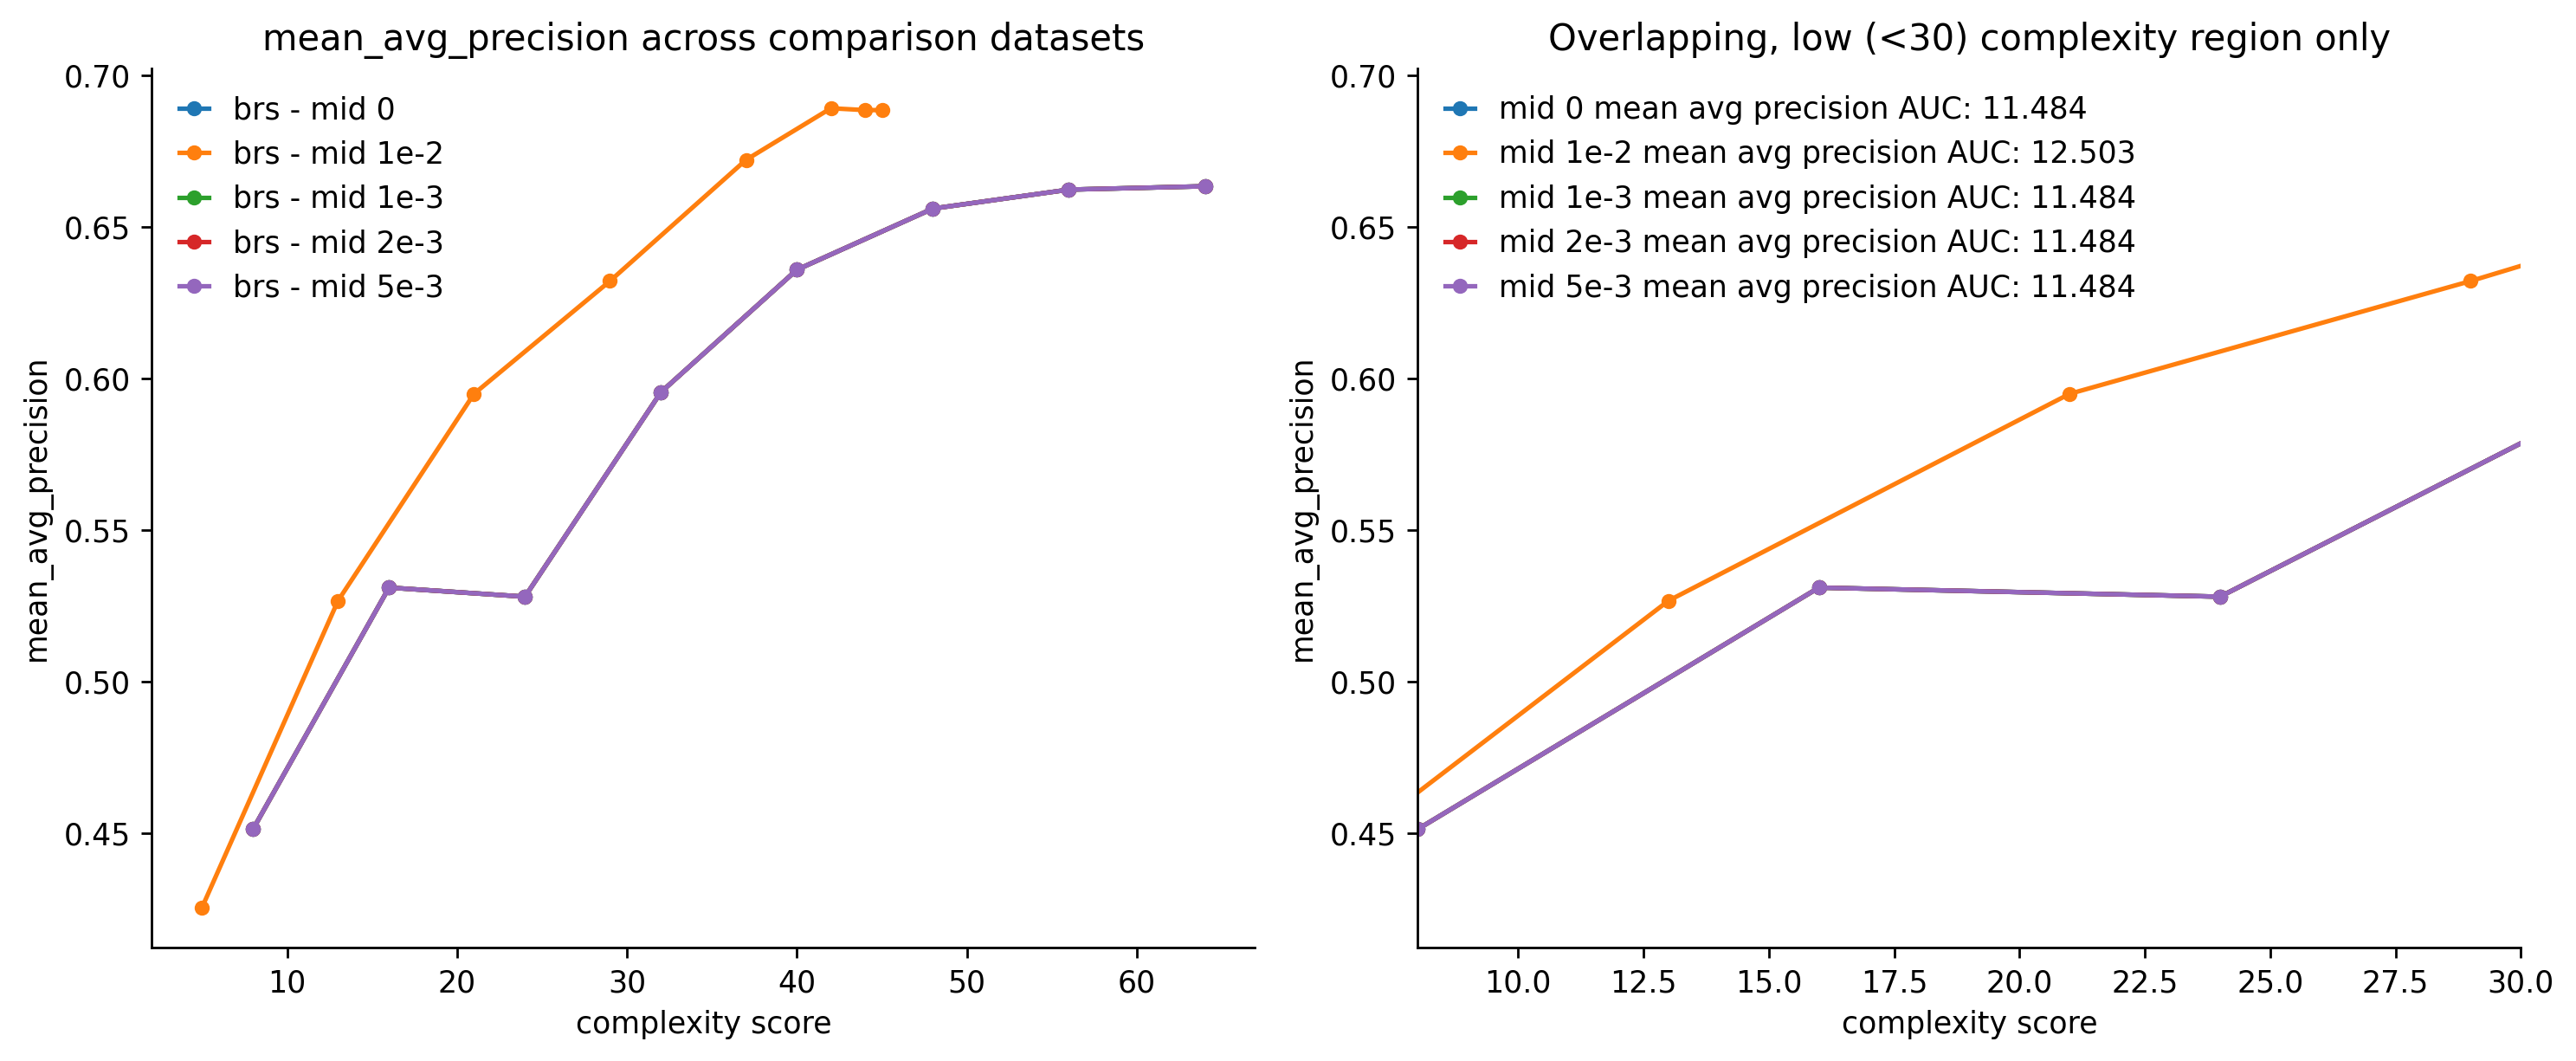

In [1103]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'brs']#'stbl_l2', 'stbl_l1', 'stbl_unlim_l1', 'stbl_unlim_fps_l1', 'fplasso', 'brl']
val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, 'juvenile') for mname in val_models]
for result in val_results:
    viz.viz_comparison_val_average(result, metric='mean_avg_precision')
    plt.show()

## cross validation

In [1053]:
# val_models = ['stbl_l2', 'stbl_l1', 'random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'fplasso', 'fpskope', 'brl', 'brs']
# val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, prefix='cv') for mname in val_models]
# for result in val_results:
#     viz.viz_comparison_val_average(result, metric='mean_ROCAUC')
#     plt.show()

In [1054]:
# viz.viz_comparison_datasets(val_results[1], 'ROCAUC', cols=2, figsize=(13, 10), datasets=['recidivism', 'credit', 'juvenile'], test=False)
# plt.show()

# validation plots - easy datasets

## single validation set

In [1055]:
# val_models = ['stbl_l2', 'stbl_l1', 'random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'fplasso', 'fpskope', 'brl', 'brs']
# val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, easy=True) for mname in val_models]
# for result in val_results:
#     viz.viz_comparison_val_average(result, metric='mean_ROCAUC')
#     plt.show()

## cross validation

In [1056]:
# val_models = ['stbl_l2', 'stbl_l1', 'random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'fplasso', 'fpskope', 'brl', 'brs']
# val_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, prefix='cv', easy=True) for mname in val_models]
# for result in val_results:
#     viz.viz_comparison_val_average(result, metric='mean_ROCAUC')
#     plt.show()

In [17]:
# get_best_model_under_complexity(5, 
#                                 model_name='brl', 
#                                 model_cls=imodels.BayesianRuleListClassifier, 
#                                 curve_param=1,
#                                 metric='mean_ROCAUC',
#                                 easy=True).__str__()
#                                 #kwargs = {'include_linear': False, 'random_state': 0, 'max_rules': None},)

In [18]:
# from slurmpy import Slurm
# partition = 'high'
# s = Slurm("compare_models", {"partition": partition})

# for i in range(36):    
#     s.run(f'python experiments/compare_models.py --model stbl_l1 --parallel_id {i*6} {(i+1)*6 - 1} --ensemble --datasets easy --ignore_cache --cv')
#     s.run(f'python experiments/compare_models.py --model stbl_l2 --parallel_id {i*6} {(i+1)*6 - 1} --ensemble --datasets easy --ignore_cache --cv')

# for i in range(18):
#     s.run(f'python experiments/compare_models.py --parallel_id {i} --ensemble --datasets easy --ignore_cache --test --low_data')

# s.run('python experiments/compare_models.py --model rulefit --test --ignore_cache --low_data')

# for i in range(4):
#     print(f'python experiments/compare_models.py --model stbl_l1 --parallel_id {i*54} {(i+1)*54 - 1} --ignore_cache --datasets easy')
#     print(f'python experiments/compare_models.py --model stbl_l2 --parallel_id {i*54} {(i+1)*54 - 1} --ignore_cache --datasets easy')

In [19]:
# s.run('python experiments/compare_models.py --test --ignore_cache --low_data')

In [20]:
# s.run('python experiments/compare_models.py --test --ensemble --ignore_cache')

In [21]:
# !python experiments/compare_models.py --test --ensemble --ignore_cache --datasets easy